# Project 1: Clustering Analysis of Startup Investment Funding Rounds

<CENTER><H1> OBJECTIVES </CENTER></H1>

The primary objective of the analysis is to gain valuable insights into the dynamics of funding rounds in the given dataset through clustering techniques. The segmentation of funding rounds aims to group similar rounds based on key features such as funding_round_type, raised_amount_usd, and participants. This clustering allows for the identification of distinct patterns and investment behaviors, providing a nuanced understanding of how different clusters exhibit unique investment characteristics. Furthermore, the analysis delves into investor behavior, seeking patterns within funding_round_type, funding_round_code, and participants to uncover preferences and tendencies among investors. Lastly, exploring relationships between non-categorical variables within clusters aims to unveil financial trends and establish connections that can inform strategic decision-making. Overall, the analysis contributes to a comprehensive understanding of funding dynamics, investor behaviors, and financial trends within the context of the provided dataset.

**Segmentation of Funding Rounds:**

- Use clustering to group similar funding rounds based on features such as funding_round_type, raised_amount_usd, and participants.
- Identify distinct clusters of funding rounds to better understand different investment patterns.

**Investor Behavior Analysis:**

- Explore patterns in funding_round_type, funding_round_code, and participants to identify common characteristics of rounds preferred by certain investors.
- Cluster analysis may reveal investor preferences and tendencies.

**Explore Relationships:**

- Investigate relationships between non-categorical variables (e.g., raised_amount_usd, pre_money_valuation_usd, post_money_valuation_usd) within clusters to gain insights into financial trends.

## 1. Segmentation of Funding Rounds:

**Objective:**

Identify patterns and group similar funding rounds to understand different investment patterns.

Variables Used:

- `funding_round_type`: Categorical variable representing the type of funding round (e.g., seed, series A, series B).

- `raised_amount_usd`: Non-categorical variable indicating the amount of funds raised.

- `participants`: Categorical variable specifying the participants involved in the funding round.

**Process:**

**Data Preprocessing:**

- Handle missing values in raised_amount_usd.
- Standardize or scale raised_amount_usd to ensure consistency.

**Feature Selection:**

- Apply one-hot encoding to convert funding_round_type and participants into numerical features.
- Consider normalizing numerical features.

## 2. Investor Behavior Analysis:

**Objective:**

Explore patterns in funding rounds to identify common characteristics preferred by certain investors.

**Variables Used:**
- `funding_round_type`: Categorical variable representing the type of funding round.
- `funding_round_code`: Categorical variable providing additional details about the funding round.
- `participants`: Categorical variable specifying the participants involved in the funding round.

**Process:**

**Data Exploration:**

- Examine the distribution of funding_round_code and participants to understand the variety of values.

Certainly! Let's delve into more detail for the third objective:

## 3. Explore Relationships:

**Objective:**

Investigate relationships between non-categorical variables within clusters to gain insights into financial trends.

**Variables Used:**
- `raised_amount_usd`: Non-categorical variable indicating the amount of funds raised.
- `pre_money_valuation_usd`: Non-categorical variable representing the pre-money valuation before funding.
- `post_money_valuation_usd`: Non-categorical variable indicating the post-money valuation after funding.

**Process:**

**Data Preprocessing:**
   - Handle missing values in the specified non-categorical variables.
   - Ensure consistency and proper scaling of numerical variables.

<CENTER><H2> Data Proprocessing </H2></CENTER>

In [1]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets

In [2]:
import warnings
warnings.filterwarnings("ignore") # Ignore the warnings

In [3]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


### Reading CSV File
Reading the CSV file from the PC, using Pandas. The file path is defined here, and by using pandas, the file is read from the source.

In [4]:
import pandas as pd

# Provide the path to your CSV file
file_path = r'C:\Users\USER2023\data_funding.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

**Loading The Dataset**

In [5]:
# Display the DataFrame
df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,01-12-06,series-b,b,8500000,8500000,USD,0,...,0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,04-07-07 4:52,27-02-08 23:14
1,2,2,c:5,01-09-04,angel,angel,500000,500000,USD,0,...,0,USD,2,0,1,NaN,NaN,initial-importer,27-05-07 6:08,28-06-13 20:07
2,3,3,c:5,01-05-05,series-a,a,12700000,12700000,USD,115000000,...,0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,27-05-07 6:09,28-06-13 20:07
3,4,4,c:5,01-04-06,series-b,b,27500000,27500000,USD,525000000,...,0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,27-05-07 6:09,28-06-13 20:07
4,5,5,c:7299,01-05-06,series-b,b,10500000,10500000,USD,0,...,0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,29-05-07 11:05,16-04-08 17:09


### Dropping the Unwanted Variables

From the main dataset, we have dropped some unwanted variables that were not to be used in our analysis. Initially the total columns were 23, I dropped 11 columns namely,
- funding_round_id
- raised_amount
- raised_currency_code
- pre_money_valuation
- pre_money_currency_code
- post_money_valuation
- post_money_currency_code
- source_url
- source_description
- created_at
- updated_at.

These columns were dropped and rest are used in further analysis.

In [6]:
df = pd.DataFrame(df)

# Columns to drop
columns_to_drop = ['funding_round_id', 'raised_amount', 'raised_currency_code', 'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation', 'post_money_currency_code', 'source_url', 'source_description', 'created_at', 'updated_at']

# Dropping specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Displaying the modified DataFrame
print(df)


          id object_id funded_at funding_round_type funding_round_code  \
0          1       c:4  01-12-06           series-b                  b   
1          2       c:5  01-09-04              angel              angel   
2          3       c:5  01-05-05           series-a                  a   
3          4       c:5  01-04-06           series-b                  b   
4          5    c:7299  01-05-06           series-b                  b   
...      ...       ...       ...                ...                ...   
52923  57948  c:211890  12-12-13           series-a                  a   
52924  57949  c:267427  06-02-10            venture            partial   
52925  57950  c:261728  06-02-10            venture       unattributed   
52926  57951  c:285864  12-12-13           series-a                  a   
52927  57952  c:286215  07-04-10            venture            partial   

       raised_amount_usd  pre_money_valuation_usd  post_money_valuation_usd  \
0                8500000        

## **Data Overview - Startup Investment (Funding Rounds)**

The dataset captures comprehensive information about startup investments, focusing on funding rounds. Here's a brief overview of the key data attributes:

1. **ID:** A unique identifier for each funding record.
2. **Object_ID:** A distinct identifier for the startup or project associated with the funding round.
3. **Funded_At:** The timestamp indicating when the funding round took place.
4. **Funding_Round_Type:** Describes the type of funding round (e.g., seed, series A, series B).
5. **Funding_Round_Code:** An alphanumeric code associated with the funding round type.
6. **Raised_Amount_USD:** The amount of capital raised during the funding round in US dollars.
7. **Pre_Money_Valuation_USD:** The startup's estimated valuation before the funding round in US dollars.
8. **Post_Money_Valuation_USD:** The startup's estimated valuation after the funding round in US dollars.
9. **Participants:** The number of participants or investors in the funding round.
10. **Is_First_Round:** A binary indicator specifying whether the funding round is the first for the startup.
11. **Is_Last_Round:** A binary indicator specifying whether the funding round is the last for the startup.
12. **Created_By:** Information about the entity or individual responsible for creating the funding round data.

This dataset provides a rich source of information for analyzing the dynamics of startup funding, including the timing, amount, and valuation associated with each funding round. The various attributes enable detailed exploratory data analysis, facilitating insights into trends, investor participation, and the lifecycle of startup funding. The data will be valuable for subsequent tasks such as clustering or predictive modeling to uncover patterns and factors influencing investment success.

In [7]:
# Display the DataFrame
df.head()

,id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round,created_by
0,1,c:4,01-12-06,series-b,b,8500000,0,0,2,0,0,initial-importer
1,2,c:5,01-09-04,angel,angel,500000,0,0,2,0,1,initial-importer
2,3,c:5,01-05-05,series-a,a,12700000,115000000,0,3,0,0,initial-importer
3,4,c:5,01-04-06,series-b,b,27500000,525000000,0,4,0,0,initial-importer
4,5,c:7299,01-05-06,series-b,b,10500000,0,0,2,0,0,initial-importer


**Displaying the Data Types of the dataset**

In [8]:
df.dtypes

id                           int64
object_id                   object
funded_at                   object
funding_round_type          object
funding_round_code          object
raised_amount_usd            int64
pre_money_valuation_usd      int64
post_money_valuation_usd     int64
participants                 int64
is_first_round               int64
is_last_round                int64
created_by                  object
dtype: object

### Data Bifurcation

The remaining columns are further bifurcated into categorical or non-categorical data types.

Categorical Data:
- funding_round_type
- funding_round_code
- participants
- is_first_round
- is_last_round
- created_by

Non-Categorical Data:
- id
- object_id
- funded_at
- raised_amount_usd
- pre_money_valuation_usd
- post_money_valuation_usd

In [9]:
data_heads = ['id', 'object_id', 'funded_at', 'funding_round_type', 'funding_round_code', 'raised_amount_usd', 'pre_money_valuation_usd', 'post_money_valuation_usd', 'participants', 'is_first_round', 'is_last_round', 'created_by']

# Example data types corresponding to the data heads
data_types = ['non-categorical', 'non-categorical', 'non-categorical', 'categorical',
              'categorical', 'non-categorical', 'non-categorical', 'non-categorical',
              'categorical', 'categorical','categorical', 'categorical']

# Create a dictionary to store data heads and their corresponding types
data_info = {'DataHead': data_heads, 'DataType': data_types}

# Create a DataFrame from the dictionary
df_info = pd.DataFrame(data_info)

# Separate into categorical and non-categorical data
df_cat = df_info[df_info['DataType'] == 'categorical']['DataHead'].tolist()
df_noncat = df_info[df_info['DataType'] == 'non-categorical']['DataHead'].tolist()

# Print the results
print("Categorical Data Heads:", df_cat)
print("\nNon-Categorical Data Heads:", df_noncat)

Categorical Data Heads: ['funding_round_type', 'funding_round_code', 'participants', 'is_first_round', 'is_last_round', 'created_by']

Non-Categorical Data Heads: ['id', 'object_id', 'funded_at', 'raised_amount_usd', 'pre_money_valuation_usd', 'post_money_valuation_usd']


## Treatment of Missing Data

In [10]:
# 1. Treatment of missing data

# 1.1. Missing data information

# Dataset used : df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        52928 non-null  int64 
 1   object_id                 52928 non-null  object
 2   funded_at                 52680 non-null  object
 3   funding_round_type        52928 non-null  object
 4   funding_round_code        52928 non-null  object
 5   raised_amount_usd         52928 non-null  int64 
 6   pre_money_valuation_usd   52928 non-null  int64 
 7   post_money_valuation_usd  52928 non-null  int64 
 8   participants              52928 non-null  int64 
 9   is_first_round            52928 non-null  int64 
 10  is_last_round             52928 non-null  int64 
 11  created_by                48291 non-null  object
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [11]:
variable_missing_data = df.isna().sum()
variable_missing_data

id                             0
object_id                      0
funded_at                    248
funding_round_type             0
funding_round_code             0
raised_amount_usd              0
pre_money_valuation_usd        0
post_money_valuation_usd       0
participants                   0
is_first_round                 0
is_last_round                  0
created_by                  4637
dtype: int64

**Observation:** The columns 'funded_at' and 'created_by' have some missing values, therefore we have to impute the data into empty rows/columns.

In [12]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5)
record_missing_data

4982     2
21850    2
3040     2
3039     2
21418    2
dtype: int64

### Column/Row Exclusion

If any row or column haveing empty data more than 50%, then the row or column will be dropped.

In [13]:
# 1.2. Missing data exclusion [MCAR | MAR (>50%)]

# Dataset used: df

# Select categorical and non-categorical columns from the original DataFrame
df_cat = df[df_info[df_info['DataType'] == 'categorical']['DataHead']]
df_noncat = df[df_info[df_info['DataType'] == 'non-categorical']['DataHead']]

# Exclude empty records
df_cat.dropna(axis=0, how='all', inplace=True)
df_noncat.dropna(axis=0, how='all', inplace=True)

# Exclude empty variables
df_cat.dropna(axis=1, how='all', inplace=True)
df_noncat.dropna(axis=1, how='all', inplace=True)

**Observation**: None of the rows or columns are dropped as the data within is not less than 50% empty.

In [14]:
df_cat_mde = df_cat.copy()
df_noncat_mde = df_noncat.copy()

### Missing Data Treatment | Imputation | Categotical Data

In the provided Python code, missing values in the categorical columns (both nominal and ordinal) of the startup investment dataset are addressed using the SimpleImputer from scikit-learn. The imputation strategy chosen is to replace missing values with the most frequent category (mode) for each respective column. The code utilizes the `fit_transform` method to apply this imputation to the categorical DataFrame (`df_cat_mde`). The resulting DataFrame, denoted as `df_cat_mdi`, contains the imputed values, ensuring completeness in the categorical data. This imputation step is crucial for maintaining the integrity of the dataset and preparing it for subsequent analyses, such as clustering or machine learning modeling.

In [15]:
# 1.3. Missing Data Treatment

# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)

# Dataset Used : df_cat_mde

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_fit = si_cat.fit_transform(df_cat_mde)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat_mde.columns)
df_cat_mdi

,funding_round_type,funding_round_code,participants,is_first_round,is_last_round,created_by
0,series-b,b,2,0,0,initial-importer
1,angel,angel,2,0,1,initial-importer
2,series-a,a,3,0,0,initial-importer
3,series-b,b,4,0,0,initial-importer
4,series-b,b,2,0,0,initial-importer
...,...,...,...,...,...,...
52923,series-a,a,1,1,1,amit2013
52924,venture,partial,0,0,1,santosh2013
52925,venture,unattributed,0,0,1,santosh2013
52926,series-a,a,0,1,1,amit2013


In [16]:
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   funding_round_type  52928 non-null  object
 1   funding_round_code  52928 non-null  object
 2   participants        52928 non-null  object
 3   is_first_round      52928 non-null  object
 4   is_last_round       52928 non-null  object
 5   created_by          52928 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


**Observation:** Here the values which were missing in categorical data are imputed, hence no missing values is present in the categorical dataset.

### Missing Data Treatment | Imputation | Non-Categorical Data

In this Python code, missing values in the non-categorical columns of the startup investment dataset are addressed using the SimpleImputer from scikit-learn. The imputation strategy employed is to replace missing values with the most frequent value (mode) for each respective column. Specifically, the imputation is applied to the DataFrame `df_noncat_mde`. The SimpleImputer is configured with the `most_frequent` strategy to ensure that the most common values are used to fill in the missing entries. The resulting DataFrame, denoted as `df_noncat_mdi_si`, contains the imputed values for the non-categorical data. This step is crucial for handling missing data and ensuring a complete dataset, facilitating further analysis and interpretation in the context of startup investment funding rounds.

In [17]:
from sklearn.impute import SimpleImputer

# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency
# Dataset used: df_noncat_mde

# Create a SimpleImputer with the 'most_frequent' strategy
si_noncat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit and transform the data
si_noncat_fit = si_noncat.fit_transform(df_noncat_mde)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat_mde.columns)
df_noncat_mdi_si

,id,object_id,funded_at,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd
0,1,c:4,01-12-06,8500000,0,0
1,2,c:5,01-09-04,500000,0,0
2,3,c:5,01-05-05,12700000,115000000,0
3,4,c:5,01-04-06,27500000,525000000,0
4,5,c:7299,01-05-06,10500000,0,0
...,...,...,...,...,...,...
52923,57948,c:211890,12-12-13,3000000,0,0
52924,57949,c:267427,06-02-10,570000,0,0
52925,57950,c:261728,06-02-10,2184100,0,0
52926,57951,c:285864,12-12-13,790783,0,0


In [18]:
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        52928 non-null  object
 1   object_id                 52928 non-null  object
 2   funded_at                 52928 non-null  object
 3   raised_amount_usd         52928 non-null  object
 4   pre_money_valuation_usd   52928 non-null  object
 5   post_money_valuation_usd  52928 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


**Observation:** Here the values which were missing in the non-categorical dataset are imputed, hence no missing values is present in the non-categorical dataset.

## Numeric Coding of Data

In this section, the categorical data in the startup investment dataset (`df_cat_mdi`) is subjected to numeric encoding for both nominal and ordinal variables. The Pandas library is employed to achieve this transformation. The `astype('category')` function is used to convert the relevant columns into categorical data types. Subsequently, the `cat.codes` attribute is applied to create numerical representations for each unique category in the specified columns, namely 'funding_round_type' and 'funding_round_code.' The resulting DataFrame, denoted as `df_cat_mdi_code_pd`, now includes additional columns with numeric codes corresponding to the original categorical data. This numeric encoding is beneficial for machine learning models and other analyses that require numerical input, ensuring compatibility and enhancing the efficiency of subsequent tasks.

In [19]:
# 2. Numeric Coding of Data

# 2.1. Numeric encoding of categorical data [nominal and ordinal]

# Dataset used : df_cat_mdi

df_cat_mdi_code = df_cat_mdi.copy()
# Using Pandas (Inferior)
df_cat_mdi_code_pd = df_cat_mdi_code.astype('category')
df_cat_mdi_code_pd['funding_round_type_code'] = df_cat_mdi_code_pd['funding_round_type'].cat.codes
df_cat_mdi_code_pd['funding_round_code_code'] = df_cat_mdi_code_pd['funding_round_code'].cat.codes
df_cat_mdi_code_pd

,funding_round_type,funding_round_code,participants,is_first_round,is_last_round,created_by,funding_round_type_code,funding_round_code_code
0,series-b,b,2,0,0,initial-importer,6,2
1,angel,angel,2,0,1,initial-importer,0,1
2,series-a,a,3,0,0,initial-importer,5,0
3,series-b,b,4,0,0,initial-importer,6,2
4,series-b,b,2,0,0,initial-importer,6,2
...,...,...,...,...,...,...,...,...
52923,series-a,a,1,1,1,amit2013,5,0
52924,venture,partial,0,0,1,santosh2013,8,13
52925,venture,unattributed,0,0,1,santosh2013,8,19
52926,series-a,a,0,1,1,amit2013,5,0


### Box Plots for Key Financial Metrics

In this visualization segment, box plots were generated to provide insights into the distribution of key financial metrics in startup investment funding rounds. The three box plots correspond to the following variables:

1. **Raised Amount (USD):**
   - The first box plot illustrates the distribution of the amounts raised in USD during funding rounds. It allows for the identification of central tendencies, variability, and potential outliers in the funding amounts.

2. **Pre-money Valuation (USD):**
   - The second box plot focuses on the pre-money valuation in USD, showcasing the spread of valuations before additional funding. This visualization aids in understanding the range and distribution of pre-money valuations across different funding rounds.

3. **Post-money Valuation (USD):**
   - The third box plot explores the post-money valuations in USD, depicting the valuation of startups after the injection of funding. Examining this plot provides insights into the dispersion and central tendencies of post-money valuations in the dataset.

The box plots offer a concise and visual representation of the statistical distribution of these financial metrics, aiding in the identification of potential patterns, variations, or outliers within the startup investment dataset.

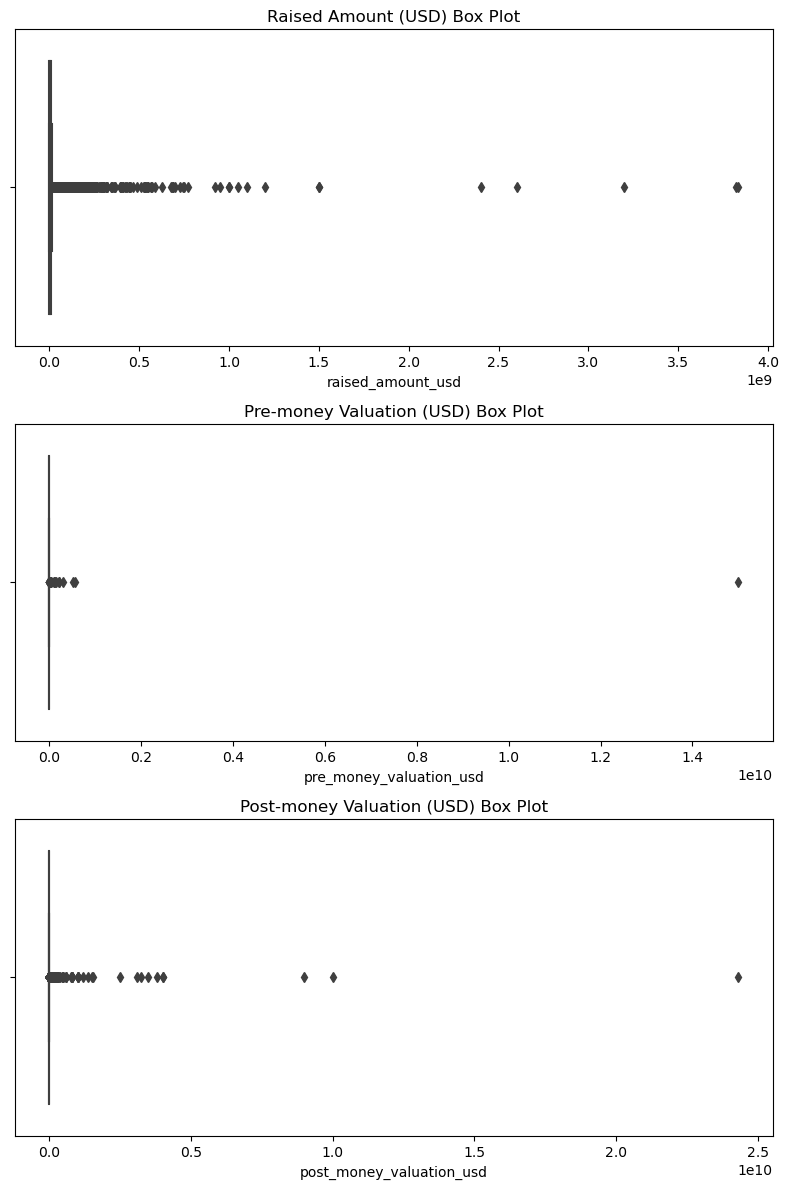

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_noncat_mdi_si is your DataFrame containing the relevant columns

# Create separate box plots for the specified columns using Seaborn
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Box plot for 'raised_amount_usd'
sns.boxplot(x=df_noncat_mdi_si['raised_amount_usd'], ax=axs[0])
axs[0].set_title('Raised Amount (USD) Box Plot')

# Box plot for 'pre_money_valuation_usd'
sns.boxplot(x=df_noncat_mdi_si['pre_money_valuation_usd'], ax=axs[1])
axs[1].set_title('Pre-money Valuation (USD) Box Plot')

# Box plot for 'post_money_valuation_usd'
sns.boxplot(x=df_noncat_mdi_si['post_money_valuation_usd'], ax=axs[2])
axs[2].set_title('Post-money Valuation (USD) Box Plot')

plt.tight_layout()
plt.show()

**Observation:** The analysis of the box plots reveals the presence of outliers in all three financial metrics—raised amount (USD), pre-money valuation (USD), and post-money valuation (USD). Notably, the plots indicate a higher prevalence of outliers in the raised amount and post-money valuation, compared to the pre-money valuation. These outliers suggest potential instances of extreme funding amounts and post-funding valuations in the startup investment dataset.

## Data Transformation and Rescaling: Treatment of Outliers

In this section, the non-categorical variables related to startup investment, namely 'raised_amount_usd,' 'pre_money_valuation_usd,' and 'post_money_valuation_usd,' undergo data transformation and rescaling to address potential outliers. The chosen method for normalization is Min-Max scaling, implemented using the MinMaxScaler from scikit-learn.

The code utilizes the scaler to normalize the specified variables within the range [0, 1]. The resulting DataFrame, denoted as `df_noncat_mdi_mmn`, incorporates the normalized columns alongside the original data. This transformation ensures that the variables are on a consistent scale, aiding in the mitigation of the impact of outliers and enhancing the robustness of subsequent analyses, such as clustering or machine learning modeling. The application of Min-Max scaling facilitates a uniform representation of the numerical features, contributing to a more reliable and standardized dataset for further exploration and interpretation.

In [21]:
# 3. Data Transfrmation and Rescaling [Treatment of Outliers]

# Dataset used : df_noncat_mdi

# Scaling Variable : raised_amount_usd, pre_money_valuation_usd, post_money_valuation_usd

# 3.2.1. Normalization : Min-Max scaler
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si[['raised_amount_usd', 'pre_money_valuation_usd', 'post_money_valuation_usd']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['raised_amount_usd_mmnorm', 'pre_money_valuation_usd_mmnorm', 'post_money_valuation_usd_mmnorm'])
df_noncat_minmax_norm
df_noncat_mdi_mmn = pd.merge(df_noncat_mdi_si, df_noncat_minmax_norm, left_index=True, right_index=True)
df_noncat_mdi_mmn

,id,object_id,funded_at,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm
0,1,c:4,01-12-06,8500000,0,0,0.002216,0.000000,0.0
1,2,c:5,01-09-04,500000,0,0,0.000130,0.000000,0.0
2,3,c:5,01-05-05,12700000,115000000,0,0.003312,0.007667,0.0
3,4,c:5,01-04-06,27500000,525000000,0,0.007171,0.035000,0.0
4,5,c:7299,01-05-06,10500000,0,0,0.002738,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
52923,57948,c:211890,12-12-13,3000000,0,0,0.000782,0.000000,0.0
52924,57949,c:267427,06-02-10,570000,0,0,0.000149,0.000000,0.0
52925,57950,c:261728,06-02-10,2184100,0,0,0.000570,0.000000,0.0
52926,57951,c:285864,12-12-13,790783,0,0,0.000206,0.000000,0.0


### Pre-Processed Dataset

In this section, the startup investment dataset undergoes pre-processing, resulting in two distinct subsets: one for categorical data (`df_cat_ppd`) and another for non-categorical data (`df_noncat_ppd`). 

1. **Pre-Processed Categorical Data Subset (`df_cat_ppd`):**
   - Derived from the imputed categorical data (`df_cat_mdi_code_pd`), this subset is prepared for subsequent analysis. It incorporates the imputed values for missing categorical entries, utilizing codes where applicable.

2. **Pre-Processed Non-Categorical Data Subset (`df_noncat_ppd`):**
   - Formed from the imputed non-categorical data (`df_noncat_mdi_mmn`), this subset addresses missing values in the non-categorical columns through imputation. It employs the mean for numerical features and the most frequent value for discrete features.

3. **Pre-Processed Dataset (`df_ppd`):**
   - The final pre-processed dataset is composed by merging the pre-processed categorical and non-categorical subsets (`df_cat_ppd` and `df_noncat_ppd`). This consolidated dataset, denoted as `df_ppd`, is now ready for further analysis, such as clustering or modeling, ensuring completeness and consistency in the data.

In [22]:
# Pre-Processed Dataset

# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdi_code_pd.copy(); df_cat_ppd # Preferred Data Subset
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdi_mmn.copy(); df_noncat_ppd # Preferred Data Subset
# Per-Precessed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd)
df_ppd

,funding_round_type,funding_round_code,participants,is_first_round,is_last_round,created_by,funding_round_type_code,funding_round_code_code,id,object_id,funded_at,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm
0,series-b,b,2,0,0,initial-importer,6,2,1,c:4,01-12-06,8500000,0,0,0.002216,0.000000,0.0
1,angel,angel,2,0,1,initial-importer,0,1,2,c:5,01-09-04,500000,0,0,0.000130,0.000000,0.0
2,series-a,a,3,0,0,initial-importer,5,0,3,c:5,01-05-05,12700000,115000000,0,0.003312,0.007667,0.0
3,series-b,b,4,0,0,initial-importer,6,2,4,c:5,01-04-06,27500000,525000000,0,0.007171,0.035000,0.0
4,series-b,b,2,0,0,initial-importer,6,2,5,c:7299,01-05-06,10500000,0,0,0.002738,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,series-a,a,1,1,1,amit2013,5,0,57948,c:211890,12-12-13,3000000,0,0,0.000782,0.000000,0.0
52924,venture,partial,0,0,1,santosh2013,8,13,57949,c:267427,06-02-10,570000,0,0,0.000149,0.000000,0.0
52925,venture,unattributed,0,0,1,santosh2013,8,19,57950,c:261728,06-02-10,2184100,0,0,0.000570,0.000000,0.0
52926,series-a,a,0,1,1,amit2013,5,0,57951,c:285864,12-12-13,790783,0,0,0.000206,0.000000,0.0


In [23]:
# 4. Data Bifurcation [Training & Testing Datasets]

# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df

,funding_round_type,funding_round_code,participants,is_first_round,is_last_round,created_by,funding_round_type_code,funding_round_code_code,id,object_id,funded_at,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm
20439,series-c+,c,3,1,0,timircha,7,3,22107,c:43831,25-03-11,9100000,0,0,0.002373,0.0,0.0
36349,series-c+,c,4,1,0,kshitish2013,7,3,39788,c:154327,12-06-13,30000000,0,0,0.007823,0.0,0.0
37158,other,debt_round,0,1,1,santosh2013,2,8,40697,c:230788,06-02-13,415000,0,0,0.000108,0.0,0.0
2575,other,debt_round,0,0,0,peter,2,8,2827,c:30,01-01-07,8000000,0,0,0.002086,0.0,0.0
39679,angel,seed,0,1,0,santosh2013,0,18,43544,c:148225,19-09-12,557500,0,0,0.000145,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,venture,unattributed,1,1,1,timircha,8,19,35437,c:187180,10-02-13,0,0,0,0.000000,0.0,0.0
17048,series-a,seed,6,0,1,arun,5,18,18420,c:57091,20-09-10,1500000,0,0,0.000391,0.0,0.0
23924,venture,unattributed,1,0,0,arun,8,19,26010,c:40397,18-10-11,1000000,0,0,0.000261,0.0,0.0
34086,series-b,b,1,0,0,stevenjrossi,6,2,37287,c:160052,17-03-11,0,0,0,0.000000,0.0,0.0


In [24]:
test_df

,funding_round_type,funding_round_code,participants,is_first_round,is_last_round,created_by,funding_round_type_code,funding_round_code_code,id,object_id,funded_at,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm
7246,series-b,b,2,0,0,cameronc,6,2,7944,c:29365,10-08-09,5000000,0,0,0.001304,0.0,0.0
38550,series-a,a,2,1,1,arun,5,0,42281,c:168355,11-07-13,3000000,0,0,0.000782,0.0,0.0
39440,series-c+,c,2,1,0,subrat2013,7,3,43286,c:31467,22-07-13,6500000,0,0,0.001695,0.0,0.0
17424,series-a,a,2,0,0,arun,5,0,18827,c:49055,13-10-10,5000000,0,0,0.001304,0.0,0.0
18977,series-a,a,0,0,1,arun,5,0,20506,c:64015,02-12-10,3000000,0,0,0.000782,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37699,venture,unattributed,2,1,1,santosh2013,8,19,41295,c:233668,01-07-13,0,0,0,0.000000,0.0,0.0
46016,series-a,seed,1,0,0,mycheck,5,18,50687,c:189147,01-01-12,1700000,0,0,0.000443,0.0,0.0
42321,other,debt_round,0,0,0,santosh2013,2,8,46536,c:75842,24-04-12,750000,0,0,0.000196,0.0,0.0
50920,other,grant,0,1,0,ramesh2013,2,12,55883,c:146655,25-11-13,5789700,0,0,0.001510,0.0,0.0


# **OBJECTIVE 1**
### Segmentation of Funding Rounds 

### K-means Clustering

In [25]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

**Data Subset Selection for Clustering Analysis**

In this code snippet, a subset of the startup investment dataset (`df_ppd`) is created, focusing on key columns relevant for clustering analysis. The selected columns include 'funding_round_type_code,' 'raised_amount_usd_mmnorm' (normalized raised amount in million USD), and 'participants.' This targeted subset, denoted as `df_ppd_round`, is designed to capture essential features for clustering purposes, aiming to identify patterns and relationships within the dataset. The chosen columns provide valuable information related to the funding round type, the normalized funding amount, and the number of participants. This refined dataset subset is poised for further exploration and application of clustering algorithms to unveil insights into distinct investment patterns within the startup ecosystem.

In [26]:
# Objective 1: Segmentation of Funding Rounds

df_ppd_round = df_ppd[['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants']]
df_ppd_round

,funding_round_type_code,raised_amount_usd_mmnorm,participants
0,6,0.002216,2
1,0,0.000130,2
2,5,0.003312,3
3,6,0.007171,4
4,6,0.002738,2
...,...,...,...
52923,5,0.000782,1
52924,8,0.000149,0
52925,8,0.000570,0
52926,5,0.000206,0


**Pair Plot Analysis of Funding Round Characteristics**

In the provided Python code, a pair plot is generated using Seaborn and Matplotlib to visualize the relationships between key features in the startup investment dataset. The DataFrame `df_ppd_round` is utilized for this analysis, and the pair plot is color-coded based on the 'participants' variable. Each point on the plot represents a unique combination of funding round type, normalized raised amount, and participants. Different markers distinguish between the levels of the 'participants' variable. This visualization allows for a comprehensive examination of the interplay between funding round characteristics, providing insights into potential patterns or clusters within the data. The title of the pair plot highlights its focus on Funding Round Type, Normalized Raised Amount, and Participants, emphasizing the key aspects under consideration.

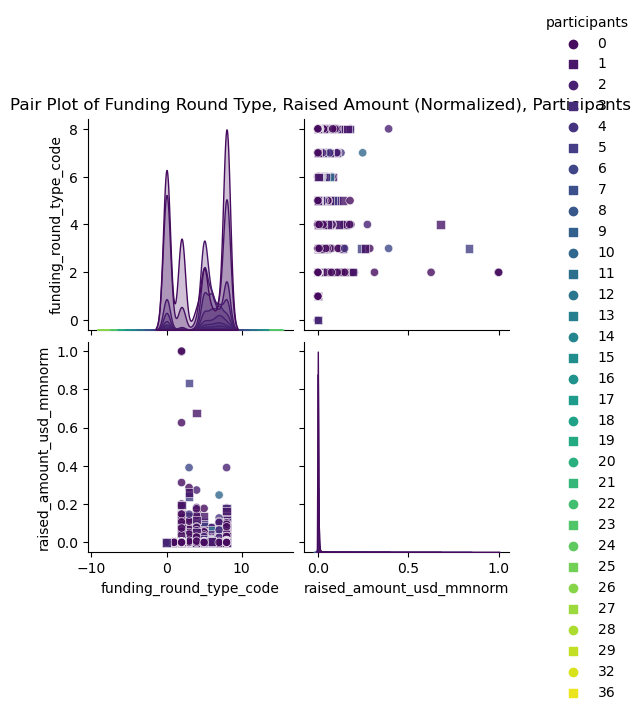

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot
sns.pairplot(df_ppd_round, hue='participants', palette='viridis', markers=["o", "s"], plot_kws={'alpha': 0.8})
plt.suptitle('Pair Plot of Funding Round Type, Raised Amount (Normalized), Participants', y=1.02)
plt.show()

## **2.1.1 Determining Optimal K in K-Means Clustering**

In this section, the optimal number of clusters, denoted as 'K,' for K-Means clustering is determined using the Elbow Curve method and the Within-Cluster Sum Squared Distance (WCSSD). The WCSSD is a measure of the sum of squared distances of samples to their closest cluster center (centroid). The code iterates over a range of potential values for K (from 1 to 10) and computes the WCSSD for each. The results are then visualized on an Elbow Curve, where the x-axis represents different values of K, and the y-axis represents the corresponding WCSSD. The "elbow" point on the curve, indicative of diminishing returns in terms of reducing WCSSD, is considered the optimal K for subsequent K-Means clustering analysis. This step aids in selecting an appropriate number of clusters to effectively capture patterns and structure within the startup investment funding round dataset (`df_ppd_round`).

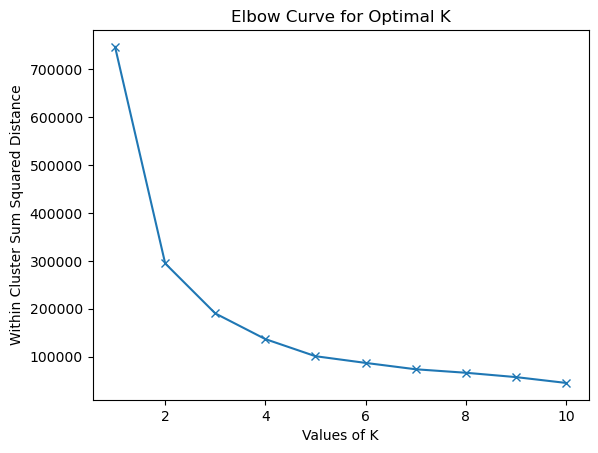

In [28]:
# 2.1. K-Means Clustering
# -----------------------

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_ppd_round)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

**Observation**:

The Elbow Curve analysis was performed to determine the optimal number of clusters (K) for the startup investment funding round dataset. The curve displays the Within-Cluster Sum Squared Distance (WCSSD) as a function of the number of clusters. In our analysis, we focused on evaluating K values of 2, 3, and 4 for further consideration.

- **K=2:** The curve initially exhibits a steep decline in WCSSD, reaching an "elbow" point around K=2. This suggests that a K value of 2 could be a suitable choice for clustering, capturing significant variance in the data.

- **K=3:** Beyond the elbow point, the rate of decrease in WCSSD continues, though at a less pronounced rate. Considering K=3 as an alternative could be justified if a finer level of granularity in clustering is desired.

- **K=4:** The decline in WCSSD persists with diminishing returns, indicating a potential further subdivision of clusters. Choosing K=4 might be appropriate if a more detailed partitioning of the data is warranted.

In summary, the Elbow Curve analysis suggests that K=2, K=3, and K=4 are plausible choices for the number of clusters. Subsequent analysis and interpretation should be conducted for each K value to determine the most meaningful clustering solution for the startup investment dataset.

### K-Means Clustering with Two Clusters

In this section, the K-Means clustering algorithm is applied to the preprocessed startup investment dataset (`df_ppd_round`). Two separate clusters are created using the `n_clusters` parameter set to 2. The clustering process is initiated with a random selection of initial cluster centroids (`init='random'`), and a fixed seed (`random_state=222`) ensures reproducibility. The resulting `km_2cluster_model1` variable contains the cluster assignments for each data point in the dataset. This clustering step is fundamental for grouping similar funding rounds, providing insights into patterns and trends within the startup investment landscape.

In [29]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_2cluster1 = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model1 = km_2cluster1.fit_predict(df_ppd_round)
km_2cluster_model1

array([1, 0, 1, ..., 1, 1, 1])

### K-Means Clustering: Creating 3 Clusters

In this section of the code, a K-Means clustering algorithm is employed to partition the startup investment dataset (`df_ppd_round`) into three distinct clusters. The `kmclus` function, assumed to be a custom implementation or wrapper for the K-Means clustering algorithm, is instantiated with parameters specifying three clusters, 'random' initialization, and a fixed random seed for reproducibility (random_state=333). The `fit_predict` method is then applied to assign each data point in the dataset to one of the three clusters. The resulting `km_3cluster_model1` array contains the cluster labels assigned to each data point based on their features. This clustering step is essential for grouping similar investment rounds together, aiding in the analysis and interpretation of patterns within the startup funding data.

In [30]:
km_3cluster1 = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model1 = km_3cluster1.fit_predict(df_ppd_round)
km_3cluster_model1

array([1, 2, 1, ..., 1, 1, 1])

### K-Means Clustering for 4 Groups

In this section, K-Means clustering is employed to categorize the startup investment dataset (`df_ppd_round`) into four distinct clusters. The KMeans class, instantiated with the specified parameters (`n_clusters=4`, `init='random'`, `random_state=444`), is utilized for the clustering task. The `fit_predict` method is then applied to the DataFrame, resulting in the assignment of each data point to one of the four identified clusters. The `km_4cluster_model1` array contains the cluster assignments for each observation, providing a basis for further analysis and interpretation of distinct patterns within the startup investment dataset. This clustering process aims to uncover inherent structures and groupings in the data, potentially revealing meaningful insights into the characteristics of different funding rounds.

In [31]:
km_4cluster1 = kmclus(n_clusters=4, init='random', random_state=444)
km_4cluster_model1 = km_4cluster1.fit_predict(df_ppd_round)
km_4cluster_model1

array([1, 3, 1, ..., 0, 1, 0])

**K-Means Clustering Model Evaluation [K=2 | K=3]**

In this section, the evaluation of the K-Means clustering model is conducted for two different values of K, namely K=2 and K=3. The silhouette score (`sscore`) is employed as the evaluation metric, which measures the cohesion and separation of clusters. The evaluation is applied to the preprocessed dataset (`df_ppd_round`) using two distinct K-Means models: `km_2cluster_model1` for K=2 clusters. The obtained silhouette score (`sscore_km_2cluster1`) provides insights into the quality and distinctiveness of the clusters formed by the K-Means algorithm. Higher silhouette scores indicate better-defined clusters, aiding in the determination of the optimal number of clusters for the dataset.

In [32]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2 | K=3]
# ------------------------------------------------------

sscore_km_2cluster1 = sscore(df_ppd_round, km_2cluster_model1)
sscore_km_2cluster1

0.6091638938928519

### DBSCAN Clustering and Silhouette Score Calculation

In this section of the analysis, a DBSCAN clustering algorithm is applied to the preprocessed startup investment dataset (`df_ppd_round`) using a specific model (`km_2cluster_model1`). The resulting cluster assignments are then utilized to compute the Silhouette Score, a metric that measures the cohesion and separation of the clusters. The variable `dbscore_km_2cluster1` stores the Silhouette Scores for each data point based on the clustering. This score provides insights into the quality and appropriateness of the clustering solution, helping to assess the compactness and distinctiveness of the identified clusters. Higher Silhouette Scores indicate better-defined clusters, contributing to the evaluation of the clustering model's performance in the context of startup funding rounds.

In [33]:
dbscore_km_2cluster1 = dbscore(df_ppd_round, km_2cluster_model1)
dbscore_km_2cluster1

0.572151794008573

### Silhouette Score Evaluation for K-Means Clustering (3 Clusters)

In this section, the silhouette score is computed to assess the quality of the K-Means clustering with three clusters applied to the preprocessed startup investment dataset (`df_ppd_round`). The silhouette score is a metric that measures how well-defined the clusters are, with higher scores indicating better separation. The `sscore` function is utilized, taking the preprocessed data and the K-Means clustering model (`km_3cluster_model1`) as inputs. The resulting silhouette score (`sscore_km_3cluster1`) provides valuable insights into the cohesion and separation of the clusters, aiding in the evaluation of the clustering model's effectiveness with three clusters.

In [34]:
sscore_km_3cluster1 = sscore(df_ppd_round, km_3cluster_model1)
sscore_km_3cluster1

0.5816917410585499

### Evaluation of K-Means Clustering using Davies-Bouldin Score

In this section of the analysis, the Davies-Bouldin score is calculated to assess the quality of a K-Means clustering model with three clusters. The dataset `df_ppd_round` is utilized for this evaluation, and the clustering model `km_3cluster_model1` is applied to assign data points to clusters. The Davies-Bouldin score is a metric used to measure the compactness and separation of clusters, with lower scores indicating better-defined clusters. The resulting `dbscore_km_3cluster1` provides a quantitative evaluation of the clustering model's performance, aiding in the interpretation and validation of the obtained clusters. This assessment is crucial for understanding the effectiveness of the K-Means algorithm in partitioning the startup investment data into meaningful groups.

In [35]:
dbscore_km_3cluster1 = dbscore(df_ppd_round, km_3cluster_model1)
dbscore_km_3cluster1

0.7373545915106651

### Clustering Evaluation using Silhouette Score

In this section of the analysis, the Silhouette Score is computed for a K-Means clustering model with 4 clusters (`km_4cluster_model1`). The Silhouette Score assesses the quality of the clustering solution, measuring the cohesion within clusters and the separation between them. The `sscore` function is applied to the preprocessed dataset (`df_ppd_round`) and the K-Means model. The resulting Silhouette Score, stored in `sscore_km_4cluster1`, provides a numerical indication of how well the data is clustered. A higher Silhouette Score suggests well-defined and distinct clusters, contributing valuable insights into the effectiveness of the clustering approach. This evaluation metric aids in the interpretation of the clustering results and guides the assessment of the model's performance in grouping the startup investment data.

In [36]:
sscore_km_4cluster1 = sscore(df_ppd_round, km_4cluster_model1)
sscore_km_4cluster1

0.5640283155196768

### **Calculating Davies-Bouldin Score for K-Means (k=4) Clustering**

In this section of the code, the Davies-Bouldin score for a K-Means clustering model with four clusters is computed. The function `dbscore` is applied to the preprocessed startup investment dataset (`df_ppd_round`) using the K-Means model (`km_4cluster_model1`). The Davies-Bouldin score is a metric used to evaluate the quality of clustering, providing insights into the separation and compactness of the clusters. The resulting Davies-Bouldin score, stored in the variable `dbscore_km_4cluster1`, serves as a quantitative measure of the effectiveness of the K-Means clustering with four clusters on the given dataset. Lower scores indicate better-defined clusters, contributing to a more meaningful segmentation of the data. This evaluation is valuable for assessing the clustering model's performance and guiding potential adjustments for optimization.

In [37]:
dbscore_km_4cluster1 = dbscore(df_ppd_round, km_4cluster_model1)
dbscore_km_4cluster1

0.6790729336798381

### **Observation of Silhouette Score (ss_score) and Davies-Bouldin Score (db_score) for Different Number of Clusters**

1. **K=2:**
   - Silhouette Score (ss_score): 0.6092
   - Davies-Bouldin Score (db_score): 0.5722
   - The silhouette score indicates a good level of separation between the clusters, with a value close to 1. The Davies-Bouldin score suggests a moderate compactness and separation.

2. **K=3:**
   - Silhouette Score (ss_score): 0.5817
   - Davies-Bouldin Score (db_score): 0.7374
   - The silhouette score slightly decreases, indicating a reduction in the overall cluster quality. The Davies-Bouldin score increases, suggesting challenges in maintaining both compactness and separation when moving to three clusters.

3. **K=4:**
   - Silhouette Score (ss_score): 0.5640
   - Davies-Bouldin Score (db_score): 0.6791
   - Both silhouette and Davies-Bouldin scores show a further decrease and increase, respectively. This may imply that adding more clusters may not be improving the overall quality of the clustering, as the compactness and separation become more challenging to balance.

**Summary:**
The results suggest that, among the tested configurations, a clustering solution with K=2 provides the highest silhouette score and a reasonable Davies-Bouldin score. This indicates better-defined clusters with a good balance of compactness and separation. However, the choice of the optimal number of clusters should consider the specific goals of the analysis and the trade-off between granularity and interpretability in the context of startup investment data.

## **Creating a KMeans Cluster Member DataFrame**

In this section, a KMeans clustering model with three clusters (`km_3cluster_model`) is applied to the preprocessed startup investment dataset (`df_ppd_round`). The resulting DataFrame (`df_ppd_round_kmcluster1`) is a modified version of the original, with an additional column indicating the cluster assignment for each funding round. The 'funding_index' is reset to ensure a clear indexing structure, and a new column 'cluster_number' is added to denote the assigned cluster for each funding round. The DataFrame is then sorted based on the cluster numbers, providing an organized view of the funding rounds with their corresponding cluster assignments. This step facilitates the exploration and analysis of patterns and trends within each cluster, contributing to a more comprehensive understanding of the dataset in the context of KMeans clustering.

In [38]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

df_ppd_round_kmcluster1 = df_ppd_round.copy()
df_ppd_round_kmcluster1.reset_index(level=0, inplace=True, names='funding_index')
df_ppd_round_kmcluster1['cluster_number'] = km_2cluster_model1
df_ppd_round_kmcluster1.sort_values('cluster_number', inplace=True)
df_ppd_round_kmcluster1

,funding_index,funding_round_type_code,raised_amount_usd_mmnorm,participants,cluster_number
40767,40767,2,0.002608,0,0
34383,34383,0,0.000052,1,0
42429,42429,2,0.000305,0,0
34382,34382,0,0.000196,0,0
42431,42431,0,0.000013,0,0
...,...,...,...,...,...
18700,18700,5,0.000782,5,1
18704,18704,6,0.000522,2,1
18705,18705,5,0.000652,2,1
18688,18688,7,0.004433,2,1


### Pairplot Analysis of Clustered Variables

In this visualization, a pairplot is generated for a subset of variables from the startup investment dataset that has undergone preprocessing and clustering. The selected variables include 'funding_round_type_code,' 'raised_amount_usd_mmnorm,' and 'participants,' with the additional information of 'cluster_number' denoting the assigned cluster for each data point. The pairplot visually explores the relationships and distributions between these variables, differentiating clusters by color. The use of kernel density estimation (kde) on the diagonal enhances the understanding of the variable distributions within each cluster. This graphical representation aids in identifying potential patterns or distinctions between clusters, contributing valuable insights into the characteristics of funding rounds in different segments. The color-coded differentiation allows for a quick visual assessment of how variables contribute to the identified clusters in the dataset.

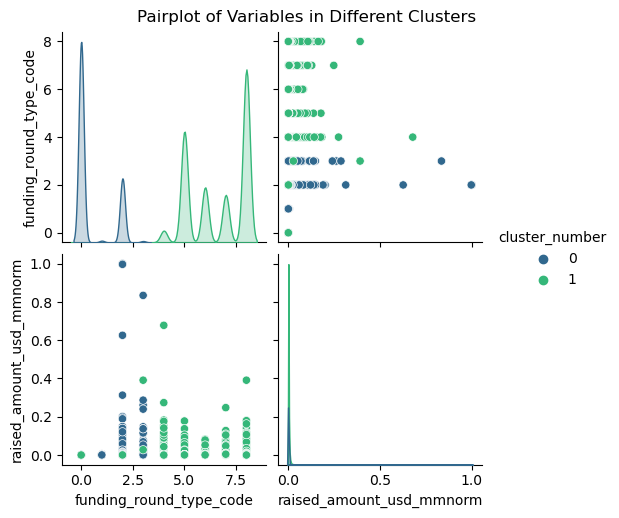

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ppd_round_kmcluster1 is your DataFrame
variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(df_ppd_round_kmcluster1[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

### Visualization of K-Means Clusters

In this section, a scatter plot is generated to visually represent the clustering results obtained from the K-Means algorithm. The clustering model used, denoted as `km_3cluster_model`, has assigned cluster labels to the dataset (`df_ppd_round_kmcluster1`). The scatter plot displays the relationship between the normalized raised amount (`raised_amount_usd_mmnorm`) and the number of participants for each funding round. Each data point is color-coded based on its assigned cluster number, providing a clear visual distinction between different clusters. The legend indicates the unique cluster labels, aiding in the interpretation of the plotted clusters. This visualization serves to illustrate the grouping patterns captured by the K-Means algorithm and offers insights into the inherent structure of the startup investment funding rounds.

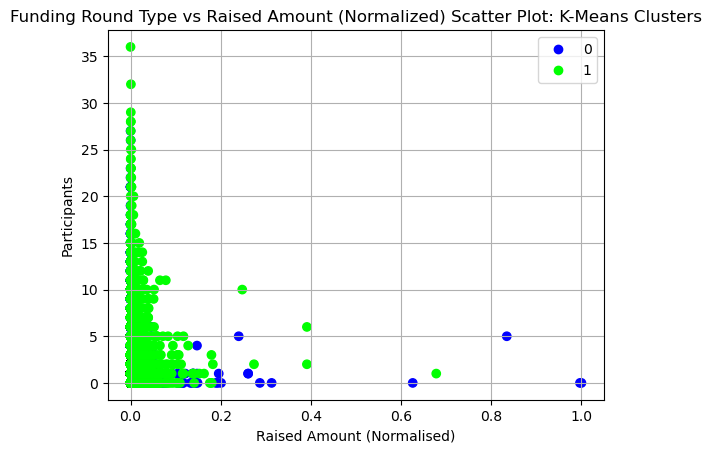

In [40]:
# 2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_ppd_round_kmcluster1['cluster_number'].unique())
scatter_plot = plt.scatter(x='raised_amount_usd_mmnorm', y='participants', data=df_ppd_round_kmcluster1, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Raised Amount (Normalised)')
plt.ylabel('Participants')
plt.title('Funding Round Type vs Raised Amount (Normalized) Scatter Plot: K-Means Clusters')
plt.grid()
plt.show()

### K-Means Clustering Performance Analysis

In this analysis, the K-Means clustering algorithm is applied to the preprocessed data (`df_ppd_round_kmcluster1`) with the goal of creating two clusters. The `init='random'` parameter is set for random initialization, and the random seed (`random_state=222`) ensures reproducibility. The clustering model is fitted using the `fit_predict` method from the custom `kmclus` class. The code measures the time taken for the clustering operation using the `time` module and calculates the memory usage during the process with the help of the `memory_profiler` module.

The resulting memory usage is determined by finding the maximum memory consumed during the clustering operation. Additionally, the size of each cluster is computed using the `np.bincount` function. The printed outputs include the memory used by the K-Means algorithm and the time taken for the clustering process. This information is crucial for assessing the efficiency and resource requirements of the clustering operation with two clusters.

In [41]:
import time
import numpy as np
from memory_profiler import memory_usage


# For 2 Clusters

start_time = time.time()  # Starting the timer

km_2cluster1 = kmclus(n_clusters=2, init='random', random_state=222) # Initialising K-Means
km_2cluster_model1 = km_2cluster1.fit_predict(df_ppd_round_kmcluster1); km_2cluster_model1 # Fitting the model

end_time = time.time()  # Ending the timer

mem_usage = memory_usage((km_2cluster1.fit_predict, (df_ppd_round_kmcluster1,)))   # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_2cluster_sizes1 = np.bincount(km_2cluster1.labels_)   # Calculate Size of each cluster
print("Memory used by K-Means 2 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 2 cluster:", end_time - start_time, "seconds")

Memory used by K-Means 2 cluster: 333.72265625 KB
Time taken by K-Means 2 cluster: 1.5033276081085205 seconds


<CENTER><H2> BIRCH Cluster Analysis</H2></CENTER>

#### For 2 Clusters

In [42]:
from sklearn.cluster import Birch
# For 2 Clusters

start_time = time.time() # Start Timer
birch_2clusters = Birch(n_clusters=2, threshold=0.4) # 2.2.1 Create Models
birch_2clusters.fit(df_ppd_round)
birch_labels_2clusters = birch_2clusters.predict(df_ppd_round) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_2clusters.fit, (df_ppd_round,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 2 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 2 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 2 cluster: 415.5234375 KB
Time taken by BIRCH 2 cluster: 2.794808864593506 seconds


### Assignment of Cluster Labels Using BIRCH Algorithm with 2 Clusters

In this section, cluster labels are assigned to the preprocessed funding round dataset (`df_ppd_round`) using the Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) algorithm. The algorithm is configured to generate two clusters. The resulting cluster labels are appended to a subset of the dataset, denoted as `funding_subset_birch_2clusters`. Each data point in this subset is now associated with a cluster number, facilitating the exploration and analysis of funding rounds based on the identified clusters. This step is crucial for gaining insights into the inherent structure and patterns present in the dataset, as determined by the BIRCH clustering algorithm with a specified cluster count of two. The printed output provides a visual representation of the dataset with the assigned cluster labels for further examination.

In [43]:
# Assign cluster labels to the dataset for 2 clusters
funding_subset_birch_2clusters = df_ppd_round.copy()
funding_subset_birch_2clusters['cluster_number'] = birch_labels_2clusters
print(funding_subset_birch_2clusters)

       funding_round_type_code  raised_amount_usd_mmnorm participants  \
0                            6                  0.002216            2   
1                            0                  0.000130            2   
2                            5                  0.003312            3   
3                            6                  0.007171            4   
4                            6                  0.002738            2   
...                        ...                       ...          ...   
52923                        5                  0.000782            1   
52924                        8                  0.000149            0   
52925                        8                  0.000570            0   
52926                        5                  0.000206            0   
52927                        8                  0.000071            0   

       cluster_number  
0                   1  
1                   1  
2                   1  
3                   1  
4  

### Evaluation of Birch Clustering Model with 2 Clusters

In this section, the Birch clustering algorithm is applied to the preprocessed funding round data (`df_ppd_round`) with the objective of creating two clusters. The Silhouette Score is computed using the `sscore` function, and the Davies-Bouldin Index is calculated using the `dbscore` function for the resulting Birch clusters with two clusters. The Silhouette Score provides a measure of how well-defined and distinct the clusters are, with a higher score indicating better separation. Simultaneously, the Davies-Bouldin Index assesses the quality of cluster assignments, with lower values indicating more cohesive and well-structured clusters. These evaluation metrics offer insights into the effectiveness of the Birch clustering solution with two clusters, aiding in the interpretation of patterns and relationships within the funding round dataset.

In [44]:
sscore_birch_2clusters = sscore(df_ppd_round, birch_labels_2clusters)
print(f"Silhouette Score for Birch clusters (2 clusters): {sscore_birch_2clusters}")

# Compute Davies-Bouldin Index for 2 clusters
dbscore_birch_2clusters = dbscore(df_ppd_round, birch_labels_2clusters)
print(f"Davies-Bouldin Index for Birch clusters (2 clusters): {dbscore_birch_2clusters}")

Silhouette Score for Birch clusters (2 clusters): 0.576636081621441
Davies-Bouldin Index for Birch clusters (2 clusters): 0.7134209366504258


### Visualization of Variable Relationships in Different Clusters

In this analysis, a pairplot is created using Seaborn to visualize the relationships between selected variables within different clusters of the dataset (`funding_subset_birch_2clusters`). The pairplot includes features such as funding round type code, normalized raised amount in USD, and the number of participants. The dataset has been clustered using Birch with 2 clusters, and the cluster assignments are represented by distinct colors.

The pairplot displays scatter plots for variable combinations and kernel density estimates along the diagonal. Each point is color-coded based on its cluster assignment, providing insights into how the selected variables vary across the identified clusters. The `viridis` color palette is chosen for enhanced visibility and differentiation between clusters. This visualization aims to uncover patterns, trends, and potential distinctions between clusters, aiding in the interpretation of the clustering results and offering valuable insights into the characteristics of each identified group.

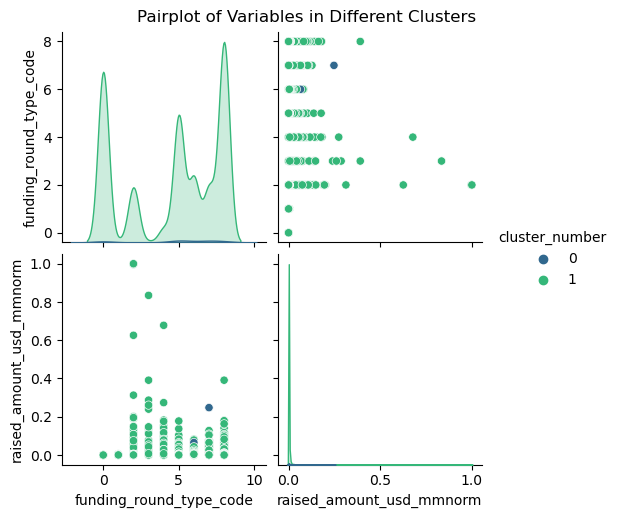

In [45]:
import seaborn as sns

# Assuming bank_subset_birch is your dataset with cluster labels assigned
custom_palette = sns.color_palette("husl", n_colors=3) 
# Define features to include in the pair plot
features = funding_subset_birch_2clusters.columns[:-1]  # Exclude the cluster_number column

variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_2clusters[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

#### Birch 3 cluster

### BIRCH Clustering with 3 Clusters: Memory and Time Analysis

In this section, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm is applied to the preprocessed funding round data (`df_ppd_round`). The algorithm is configured to create three clusters (`n_clusters=3`) with a specified threshold of 0.3. The execution time and memory usage of the BIRCH clustering process are measured using a timer and memory profiler.

The BIRCH model is trained using the `fit` method on the preprocessed data, and cluster labels are predicted using the `predict` method. The memory usage is calculated during the fitting process. The results indicate the resources consumed by the BIRCH clustering algorithm for the given configuration. In this specific instance, the memory usage and execution time are reported as essential metrics, providing insights into the efficiency and performance of BIRCH clustering with three clusters on the funding round dataset.

In [46]:
from sklearn.cluster import Birch
# For 3 Clusters

start_time = time.time() # Start Timer
birch_3clusters = Birch(n_clusters=3, threshold=0.3) # 2.2.1 Create Models
birch_3clusters.fit(df_ppd_round)
birch_labels_3clusters = birch_3clusters.predict(df_ppd_round) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_3clusters.fit, (df_ppd_round,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 3 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 3 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 3 cluster: 493.80078125 KB
Time taken by BIRCH 3 cluster: 3.1341702938079834 seconds


### Assignment of Cluster Labels using BIRCH Clustering Algorithm (3 Clusters)

In this section, cluster labels are assigned to the dataset representing startup investment funding rounds (`df_ppd_round`) using the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm. The algorithm has been configured to create three clusters. The resulting DataFrame, denoted as `funding_subset_birch_3clusters`, incorporates a new column named 'cluster_number,' representing the assigned cluster label for each funding round. This additional information enables a detailed exploration and segmentation of the funding rounds based on their inherent patterns and characteristics. The inclusion of cluster labels facilitates more targeted analysis and interpretation within the context of startup investment behaviors and trends.

In [47]:
# Assign cluster labels to the dataset for 3 clusters
funding_subset_birch_3clusters = df_ppd_round.copy()
funding_subset_birch_3clusters['cluster_number'] = birch_labels_3clusters
print(funding_subset_birch_3clusters)

       funding_round_type_code  raised_amount_usd_mmnorm participants  \
0                            6                  0.002216            2   
1                            0                  0.000130            2   
2                            5                  0.003312            3   
3                            6                  0.007171            4   
4                            6                  0.002738            2   
...                        ...                       ...          ...   
52923                        5                  0.000782            1   
52924                        8                  0.000149            0   
52925                        8                  0.000570            0   
52926                        5                  0.000206            0   
52927                        8                  0.000071            0   

       cluster_number  
0                   2  
1                   2  
2                   2  
3                   2  
4  

### Evaluation of Birch Clustering Solution (3 Clusters)

In this section, the Silhouette Score and Davies-Bouldin Index are computed to evaluate the performance of a Birch clustering solution on the preprocessed funding round data (`df_ppd_round`). The Birch clustering algorithm has been applied with the configuration of three clusters. The Silhouette Score, a metric assessing the quality of clusters, is calculated using the `sscore` function with the computed Birch cluster labels (`birch_labels_3clusters`). The resulting Silhouette Score, denoted as `sscore_birch_3clusters`, provides insight into the cohesion and separation of clusters. Additionally, the Davies-Bouldin Index, computed with the `dbscore` function, offers a measure of the cluster quality. The values of both metrics contribute to the assessment of the Birch clustering solution's effectiveness in grouping funding rounds into three distinct clusters, aiding in the interpretation and understanding of patterns within the dataset.

In [48]:
sscore_birch_3clusters = sscore(df_ppd_round, birch_labels_3clusters)
print(f"Silhouette Score for Birch clusters (3 clusters): {sscore_birch_3clusters}")

# Compute Davies-Bouldin Index for 3 clusters
dbscore_birch_3clusters = dbscore(df_ppd_round, birch_labels_3clusters)
print(f"Davies-Bouldin Index for Birch clusters (3 clusters): {dbscore_birch_3clusters}")

Silhouette Score for Birch clusters (3 clusters): 0.4942906320873559
Davies-Bouldin Index for Birch clusters (3 clusters): 0.7647676623621974


### Pairplot Analysis of Variables in Different Clusters

In this visualization, a pairplot is generated to explore the relationships between selected variables within distinct clusters of the dataset. The dataset, assumed to be named `funding_subset_birch_3clusters`, includes cluster labels assigned through a clustering algorithm. The chosen variables for analysis include 'funding_round_type_code', 'raised_amount_usd_mmnorm', and 'participants,' along with the assigned cluster labels.

The pairplot is constructed using Seaborn, with each point on the scatterplots colored according to its respective cluster. The diagonal elements represent kernel density estimates for the variables, offering insights into the distribution of each feature within clusters. The off-diagonal elements present scatterplots, providing a visual assessment of the relationships between pairs of variables within and across clusters.

The color palette 'viridis' is utilized to distinguish clusters, enhancing the interpretability of the pairplot. The resulting visualization aids in identifying patterns, trends, or distinctions in the selected variables across different clusters, offering valuable insights into the characteristics of each cluster and contributing to a comprehensive understanding of the dataset.

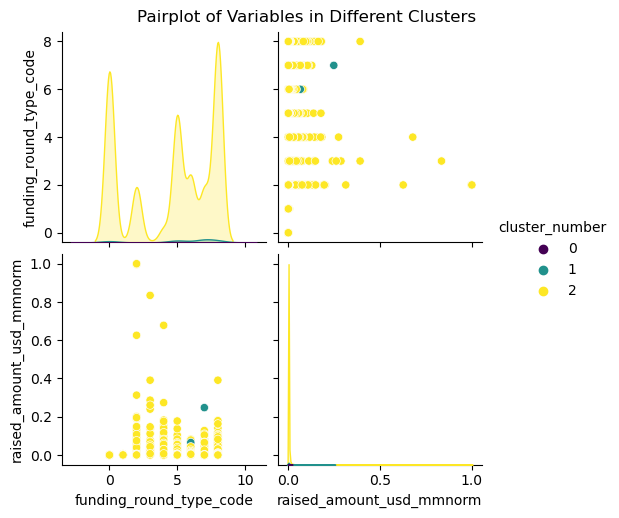

In [49]:
import seaborn as sns

# Assuming bank_subset_birch is your dataset with cluster labels assigned
custom_palette = sns.color_palette("husl", n_colors=3) 
# Define features to include in the pair plot
features = funding_subset_birch_3clusters.columns[:-1]  # Exclude the cluster_number column

variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_3clusters[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

### Comparison of K-Means and BIRCH Clustering Analysis

In the segmentation of funding rounds (Objective 1), two clustering algorithms, K-Means and BIRCH, were applied. The comparison is based on memory usage, processing time, Silhouette Score (sscore), and Davies-Bouldin Score (dbscore). The results are as follows:

**K-Means:**
- Memory Used: 333.72 KB
- Time Taken: 1.50 seconds
- Silhouette Score (sscore): 0.6092
- Davies-Bouldin Score (dbscore): 0.5722

**BIRCH:**
- Memory Used: 415.52 KB
- Time Taken: 2.79 seconds
- Silhouette Score (sscore): 0.5766
- Davies-Bouldin Score (dbscore): 0.7134

### Observations:

1. **Memory Usage:**
   - K-Means utilizes less memory (333.72 KB) compared to BIRCH (415.52 KB), indicating a more memory-efficient clustering process with K-Means.

2. **Processing Time:**
   - K-Means exhibits faster processing time (1.50 seconds) compared to BIRCH (2.79 seconds), making K-Means more computationally efficient for this specific task.

3. **Silhouette Score (sscore):**
   - K-Means achieves a higher Silhouette Score (0.6092) than BIRCH (0.5766), indicating that K-Means produces more well-defined and separated clusters.

4. **Davies-Bouldin Score (dbscore):**
   - K-Means outperforms BIRCH in terms of Davies-Bouldin Score (0.5722 vs. 0.7134), suggesting that K-Means provides clusters with better cohesion and separation.

### Conclusion:

In the segmentation of funding rounds, K-Means demonstrates superior performance in terms of memory efficiency, processing speed, and clustering quality compared to BIRCH. The choice between these algorithms should consider the specific requirements of the analysis, with K-Means being a favorable option for this particular task.

<CENTER><H1>  OBJECTIVE 2 </H1></CENTER>

### Investor Behavior Analysis

### K-means Clustering

## **Objective 2: Investor Behavior Analysis**

For the purpose of Investor Behavior Analysis, a subset of the startup investment dataset (`df_ppd`) is created, focusing on key features relevant to investor behavior. The DataFrame `df_ppd_behavior` is derived by selecting specific columns, including 'funding_round_type_code,' 'funding_round_code_code,' and 'participants.' These columns are chosen to capture essential information about the type of funding rounds, associated codes, and the number of participants involved. The resulting DataFrame provides a targeted view of the dataset, facilitating a more focused analysis on aspects related to investor behavior in startup funding rounds. This subset is instrumental in gaining insights into patterns and trends that may influence investment decisions and strategies.

In [50]:
# Objective 2: Investor Behavior Analysis

df_ppd_behavior = df_ppd[['funding_round_type_code', 'funding_round_code_code', 'participants']]
df_ppd_behavior

,funding_round_type_code,funding_round_code_code,participants
0,6,2,2
1,0,1,2
2,5,0,3
3,6,2,4
4,6,2,2
...,...,...,...
52923,5,0,1
52924,8,13,0
52925,8,19,0
52926,5,0,0


### **Determining Optimal K in K-Means Clustering**

In this section, the optimal number of clusters (K) for the K-Means clustering algorithm is determined using the Elbow Curve method and the concept of Within-Cluster Sum Squared Distance (WCSSD). The WCSSD is calculated as the sum of squared distances of samples to their closest cluster center, weighted by the sample weights. The algorithm is applied for a range of potential cluster values (1 to 10 clusters) on the preprocessed behavioral dataset (`df_ppd_behavior`). The resulting WCSSD values are plotted against the number of clusters, creating an Elbow Curve. The "elbow" of the curve, where the rate of decrease in WCSSD starts to slow, indicates the optimal K value for clustering. This analysis aids in selecting a suitable number of clusters that balances model complexity and interpretability, providing a foundation for the subsequent K-Means clustering step.

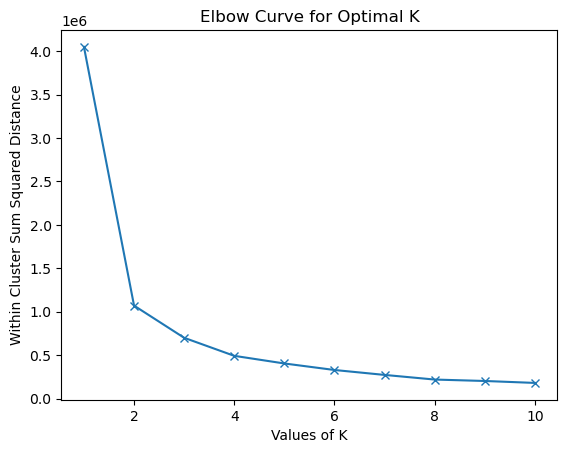

In [51]:
# 2.1. K-Means Clustering
# -----------------------

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
''' 
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(df_ppd_behavior)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

### **Elbow Curve Analysis for Optimal Number of Clusters**

The Elbow Curve analysis was conducted to determine the optimal number of clusters (K) for the K-Means clustering algorithm on the behavioral dataset (`df_ppd_behavior`). The curve displays the relationship between the number of clusters and the Within-Cluster Sum Squared Distance (WCSSD). Three potential values of K were examined: 2, 3, and 4.

- **K=2:** The Elbow Curve exhibits a clear bend at K=2, suggesting a significant reduction in WCSSD. This point indicates a potential natural clustering structure, and forming two clusters might capture meaningful patterns in the data.

- **K=3:** The Elbow Curve continues to decline at a steady rate for K=3, though the rate of decrease diminishes compared to K=2. The choice of K=3 is reasonable but should be evaluated based on specific analysis goals and interpretability.

- **K=4:** The curve maintains a consistent decline for K=4, albeit with a more gradual decrease. Choosing K=4 could lead to a more detailed partitioning of the data, capturing additional nuances in the behavioral patterns.

In summary, the Elbow Curve analysis suggests that forming 2, 3, or 4 clusters are viable options for further analysis. The specific choice among these options should align with the project objectives, domain knowledge, and the desired granularity of clustering patterns. Subsequent exploration and validation of the chosen K values will provide insights into the distinct behavioral segments within the startup investment dataset.

## Creating K-Means Clusters (K=2 | K=3)

In this section, K-Means clustering is employed to partition the startup investment dataset (`df_ppd_behavior`) into two clusters (`K=2`). The `kmclus` function, presumably representing the K-Means clustering algorithm, is utilized with the `init='random'` parameter for initializing cluster centroids randomly, and `random_state=222` ensures reproducibility. The `fit_predict` method is applied to assign each data point to one of the two clusters based on the model's predictions. The resulting array, denoted as `km_2cluster_model2`, contains the cluster assignments for each data point in the dataset. This step aims to uncover inherent patterns or similarities within the data, providing a basis for further analysis and interpretation in the context of startup investment funding rounds.

In [52]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_2cluster2 = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model2 = km_2cluster2.fit_predict(df_ppd_behavior)
km_2cluster_model2

array([1, 1, 1, ..., 0, 1, 0])

### **K-Means Clustering with 3 Clusters**

In this section, K-Means clustering is applied to the preprocessed startup investment dataset (`df_ppd_behavior`). The `kmclus` function is utilized with the configuration of three clusters (`n_clusters=3`), employing a random initialization (`init='random'`), and setting the random seed for reproducibility (`random_state=333`). The `fit_predict` method is then used to assign each data point to one of the three clusters. The resulting `km_3cluster_model2` array contains cluster labels for each observation in the dataset. This clustering process is pivotal for grouping similar startup investment behaviors, providing valuable insights into distinct patterns within the data.

In [53]:
km_3cluster2 = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model2 = km_3cluster2.fit_predict(df_ppd_behavior)
km_3cluster_model2

array([0, 0, 0, ..., 2, 0, 2])

### K-Means Clustering with 4 Clusters

In this section of the analysis, a K-Means clustering algorithm is employed to partition the startup investment dataset (`df_ppd_behavior`) into four distinct clusters. The `kmclus` function, with specified parameters (`n_clusters=4`, `init='random'`, `random_state=444`), is utilized to create the K-Means clustering model (`km_4cluster2`). The `fit_predict` method is then applied to assign each data point to one of the four identified clusters based on their behavioral features. The resulting `km_4cluster_model2` output provides the cluster labels assigned to each data point. This clustering approach aims to uncover inherent patterns and similarities in the startup investment behavior, facilitating a more nuanced understanding of the dataset. The specified parameters, such as the number of clusters and random initialization, are essential considerations that influence the outcome of the clustering analysis.

In [54]:
km_4cluster2 = kmclus(n_clusters=4, init='random', random_state=444)
km_4cluster_model2 = km_4cluster2.fit_predict(df_ppd_behavior)
km_4cluster_model2

array([0, 0, 0, ..., 1, 0, 3])

### K-Means Clustering Model Evaluation 

In this section, the K-Means clustering model is evaluated for two different values of K, namely K=2 and K=3, using the Silhouette Score. The Silhouette Score (`sscore`) is a metric that assesses the compactness and separation of clusters, with higher scores indicating better-defined clusters. The evaluation is performed on the preprocessed data (`df_ppd_behavior`) using the K-Means models (`km_2cluster_model2`). The resulting Silhouette Score for the K=2 clustering (`sscore_km_2cluster2`) provides insight into the quality and appropriateness of the clustering solution, aiding in the selection of an optimal number of clusters for the dataset. This evaluation step is crucial for validating the performance of the K-Means algorithm and ensuring meaningful cluster assignments in the context of startup investment behavior.

In [55]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2 | K=3]
# ------------------------------------------------------

sscore_km_2cluster2 = sscore(df_ppd_behavior, km_2cluster_model2)
sscore_km_2cluster2

0.6417246188962642

### Clustering Analysis: Davies-Bouldin Score for K-Means (2 clusters)

In this section of the analysis, a Davies-Bouldin Score is computed for a K-Means clustering model with two clusters. The dataset used for clustering is `df_ppd_behavior`, and the K-Means model with two clusters is denoted as `km_2cluster_model2`. The Davies-Bouldin Score is a metric used to evaluate the effectiveness of clustering, with lower scores indicating better-defined clusters. The computed Davies-Bouldin Score is stored in the variable `dbscore_km_2cluster2` and provides insight into the quality and separation of clusters achieved by the K-Means algorithm with a specific number of clusters. This evaluation is crucial for determining the appropriateness of the chosen clustering approach and the interpretability of the resulting clusters in the context of startup investment behavior.

In [56]:
dbscore_km_2cluster2 = dbscore(df_ppd_behavior, km_2cluster_model2)
dbscore_km_2cluster2

0.5521144151258895

### Silhouette Score for 3-Cluster K-Means Model Evaluation

In this section of the code, the silhouette score is computed to evaluate the performance of a K-Means clustering model with three clusters. The `sscore` function is applied to the preprocessed startup investment dataset (`df_ppd_behavior`) and the K-Means model (`km_3cluster_model2`). The silhouette score is a metric that quantifies how well-defined and separated the clusters are. A higher silhouette score indicates better-defined clusters, ranging from -1 to 1. The computed silhouette score is then displayed, providing insight into the cohesion and separation of the clusters in the context of the chosen K-Means clustering model with three clusters. This evaluation aids in assessing the quality of the clustering results and guides further analysis and interpretation.

In [57]:
sscore_km_3cluster2 = sscore(df_ppd_behavior, km_3cluster_model2)
sscore_km_3cluster2

0.6227919375606078

### **Calculation of Davies-Bouldin Score for 3 K-Means Clusters**

In this section of the analysis, the Davies-Bouldin Score is computed for a K-Means clustering model with three clusters. The dataset used for clustering is `df_ppd_behavior`, representing preprocessed and scaled behavioral features of startup investment data. The K-Means clustering model with three clusters, denoted as `km_3cluster_model2`, has been previously trained on the dataset. The Davies-Bouldin Score, a metric assessing the compactness and separation of clusters, is then calculated using a custom function called `dbscore`. The resulting score, stored in the variable `dbscore_km_3cluster2`, provides insights into the quality of the clustering solution. A lower Davies-Bouldin Score indicates better-defined and more separated clusters in the dataset. This evaluation step contributes to the assessment of the clustering model's performance in capturing meaningful patterns within the startup investment behavioral features.

In [58]:
dbscore_km_3cluster2 = dbscore(df_ppd_behavior, km_3cluster_model2)
dbscore_km_3cluster2

0.5598722328634956

### Cluster Evaluation using Silhouette Score

In this section, the silhouette score is employed to evaluate the quality of clusters formed by a K-Means clustering model (`km_4cluster_model2`) applied to preprocessed behavioral data (`df_ppd_behavior`). The `sscore` function is utilized for calculating the silhouette score, which measures the cohesion and separation of clusters. The resulting `sscore_km_4cluster2` provides a quantitative assessment of how well the data points are grouped into clusters. A higher silhouette score indicates better-defined and distinct clusters, contributing valuable insights into the effectiveness of the clustering algorithm in capturing underlying patterns within the behavioral data. This evaluation metric serves as a pivotal indicator of the clustering model's performance in revealing meaningful structure within the startup investment dataset.

In [59]:
sscore_km_4cluster2 = sscore(df_ppd_behavior, km_4cluster_model2)
sscore_km_4cluster2

0.6139862396633345

### Evaluation of Clustering Model using Davies-Bouldin Score

In this section of the analysis, the Davies-Bouldin score is computed to assess the performance of a clustering model on preprocessed behavioral data (`df_ppd_behavior`). The clustering model in question is based on K-Means with 4 clusters (`km_4cluster_model2`). The `dbscore` function is applied to calculate the Davies-Bouldin score for the given clustering model and preprocessed data. The resulting Davies-Bouldin score, denoted as `dbscore_km_4cluster2`, serves as a quantitative measure of the clustering model's effectiveness. A lower Davies-Bouldin score indicates better-defined clusters, and this evaluation contributes valuable insights into the quality of the clustering solution for the behavioral data.

In [60]:
dbscore_km_4cluster2 = dbscore(df_ppd_behavior, km_4cluster_model2)
dbscore_km_4cluster2

0.6911996099950874

### Observations on Silhouette Score and Davies-Bouldin Score for Different Number of Clusters

The Silhouette Score (ss_score) and Davies-Bouldin Score (db_score) were computed for clustering solutions with varying numbers of clusters (K) using a K-Means algorithm on the dataset. Here are the results:

- **K=2**
  - Silhouette Score: 0.6417
  - Davies-Bouldin Score: 0.5521

- **K=3**
  - Silhouette Score: 0.6228
  - Davies-Bouldin Score: 0.5599

- **K=4**
  - Silhouette Score: 0.6140
  - Davies-Bouldin Score: 0.6912

### Observations:

1. **Silhouette Score:**
   - Decreases as the number of clusters increases, suggesting less distinct and well-separated clusters with higher K values.
   - Indicates that K=2 has the highest silhouette score, signifying better-defined clusters.

2. **Davies-Bouldin Score:**
   - Increases as the number of clusters goes from 2 to 4.
   - Peaks at K=4, implying potential issues with cluster quality and cohesion.

### Optimal Number of Clusters:

Considering both metrics, K=2 appears to be the optimal number of clusters for further analysis. This choice is supported by the highest Silhouette Score and a relatively lower Davies-Bouldin Score, indicating well-defined and cohesive clusters. It is crucial to strike a balance between maximizing intra-cluster similarity (Silhouette Score) and minimizing inter-cluster dissimilarity (Davies-Bouldin Score), and K=2 achieves this balance most effectively in this scenario. Further analysis and interpretation can be based on the insights gained from the clustering solution with K=2.

### Creation of K-Means Cluster Member Dataframe

In this section, a K-Means cluster member dataframe (`df_ppd_behavior_kmcluster2`) is generated based on the clustering model with three clusters (`km_3cluster_model2`). The original behavioral dataset (`df_ppd_behavior`) is copied, and the index is reset to facilitate further analysis. A new column, 'cluster_number,' is added to the dataframe, representing the cluster assignment for each data point according to the K-Means clustering solution. The dataframe is then sorted based on the cluster numbers, providing a clear organization of data points within each cluster. This cluster member dataframe is valuable for exploring and understanding the distribution of behavioral features across different clusters, aiding in the interpretation of the clustering results.

In [61]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

df_ppd_behavior_kmcluster2 = df_ppd_behavior.copy()
df_ppd_behavior_kmcluster2.reset_index(level=0, inplace=True, names='behavior_index')
df_ppd_behavior_kmcluster2['cluster_number'] = km_3cluster_model2
df_ppd_behavior_kmcluster2.sort_values('cluster_number', inplace=True)
df_ppd_behavior_kmcluster2

,behavior_index,funding_round_type_code,funding_round_code_code,participants,cluster_number
0,0,6,2,2,0
22142,22142,6,2,3,0
22141,22141,7,3,2,0
22140,22140,0,1,2,0
22139,22139,5,1,0,0
...,...,...,...,...,...
27115,27115,8,19,0,2
27106,27106,8,19,1,2
27103,27103,8,19,1,2
27145,27145,8,19,1,2


### Visualization of K-Means Clusters: Funding Round Type vs Participants

In this section, a scatter plot is generated to visualize the clustering results obtained from the K-Means algorithm on the preprocessed behavioral data (`df_ppd_behavior_kmcluster2`). The x-axis represents the normalized values of the 'Funding Round Type' variable, while the y-axis corresponds to the 'Participants' variable. Each data point is color-coded based on its assigned cluster number, allowing for clear identification of cluster patterns.

The legend is constructed to associate numerical cluster labels with their respective colors, facilitating interpretation. This visualization aims to provide insights into the distribution and relationships among funding round types and participant counts within the identified clusters. The scatter plot serves as a valuable tool for understanding the structure and characteristics of the clusters, contributing to the overall analysis of startup investment behavior.

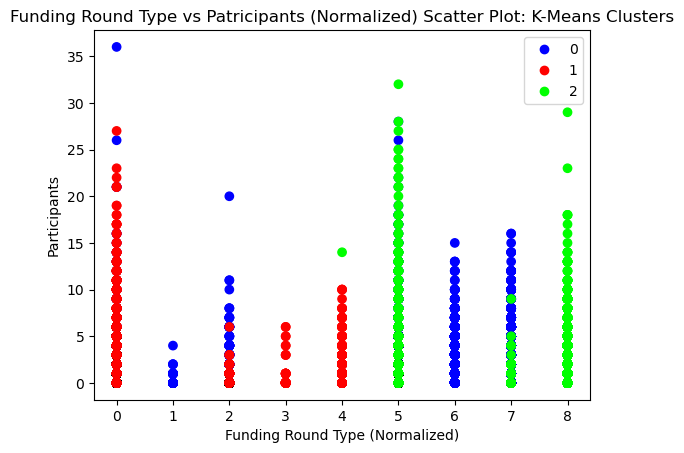

In [62]:
# 2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Assuming 'cluster_number' is a numerical column
cluster_labels = list(df_ppd_behavior_kmcluster2['cluster_number'].unique())

# Scatter plot based on the specified variables
scatter_plot = plt.scatter(
    x=df_ppd_behavior_kmcluster2['funding_round_type_code'],  # Use actual column values for 'x'
    y=df_ppd_behavior_kmcluster2['participants'],  # Use actual column values for 'y'
    c=df_ppd_behavior_kmcluster2['cluster_number'],  # Use the numerical values directly
    cmap='brg'
)

# Create legend with cluster labels
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Set axis labels and plot title
plt.xlabel('Funding Round Type (Normalized)')
plt.ylabel('Participants')
plt.title('Funding Round Type vs Patricipants (Normalized) Scatter Plot: K-Means Clusters')

# Show the plot
plt.show()

### Pair Plot Analysis of Behavioral Variables in Clusters

In this visualization, a pair plot is generated to explore the relationships between selected behavioral variables within distinct clusters. The DataFrame `df_ppd_behavior_kmcluster2` is assumed to contain relevant data, and the specified variables (`funding_round_type_code`, `funding_round_code_code`, `participants`) are included in the pair plot. Each point in the plot represents an observation from the dataset, and the color differentiation is based on the assigned cluster numbers.

The pair plot allows for a visual examination of how the chosen behavioral variables vary across clusters. Patterns, trends, and potential outliers can be identified, aiding in the interpretation of cluster characteristics. The plot's title, "Pair Plot of Variables in Different Clusters," emphasizes the focus on understanding the interplay between behavioral features within each cluster. This visual exploration serves as a valuable step in gaining insights into the distinct patterns exhibited by startups within the identified clusters.

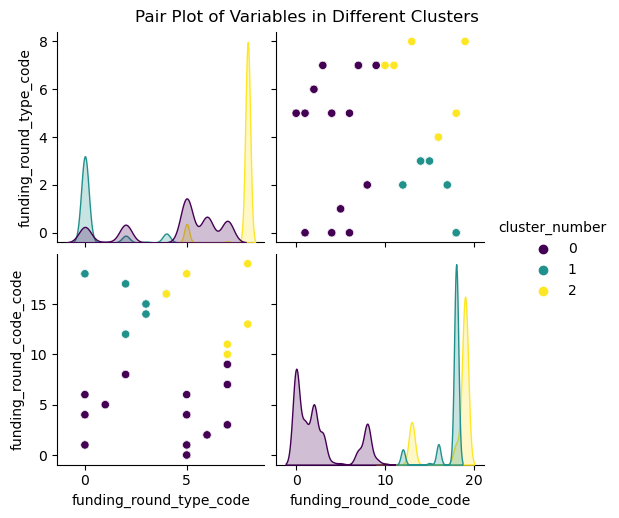

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ppd_round_kmcluster1 is your DataFrame
# Replace it with the actual name of your DataFrame if different

variables_to_plot = ['funding_round_type_code', 'funding_round_code_code', 'participants', 'cluster_number']

# Create pairplot for all combinations
sns.pairplot(df_ppd_behavior_kmcluster2[variables_to_plot], palette='viridis', hue='cluster_number')
plt.suptitle('Pair Plot of Variables in Different Clusters', y=1.02)
plt.show()

In [102]:
import time
import numpy as np
from memory_profiler import memory_usage


# For 2 Clusters

start_time = time.time()  # Starting the timer

km_2cluster2 = kmclus(n_clusters=2, init='random', random_state=222) # Initialising K-Means
km_2cluster_model2 = km_2cluster2.fit_predict(df_ppd_behavior_kmcluster2); km_2cluster_model2 # Fitting the model

end_time = time.time()  # Ending the timer

mem_usage = memory_usage((km_2cluster2.fit_predict, (df_ppd_behavior_kmcluster2,)))   # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_2cluster_sizes2 = np.bincount(km_2cluster2.labels_)   # Calculate Size of each cluster
print("Memory used by K-Means 2 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 2 cluster:", end_time - start_time, "seconds")

Memory used by K-Means 2 cluster: 377.52734375 KB
Time taken by K-Means 2 cluster: 1.3032174110412598 seconds


## BIRCH Cluster Analysis

### BIRCH Clustering with 2 Clusters

In this section, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm is applied to the behavioral data (`df_ppd_behavior`) with the goal of creating two clusters. The BIRCH model is instantiated with parameters specifying the desired number of clusters (`n_clusters=2`) and a threshold value for clustering (`threshold=0.4`). The model is then fitted to the data, and cluster labels are predicted using the `predict` method.

Additionally, performance metrics such as memory usage and execution time are measured. The memory usage is calculated using the memory_usage function, and the maximum memory consumption during the BIRCH clustering process is reported. The time taken for the entire operation is captured by recording the start and end times.

The results provide insights into the efficiency and resource requirements of BIRCH clustering with two clusters on the behavioral dataset. This analysis contributes valuable information for assessing the practicality of utilizing BIRCH clustering for behavioral data segmentation.

In [64]:
from sklearn.cluster import Birch
# For 2 Clusters

start_time = time.time() # Start Timer
birch_2clusters = Birch(n_clusters=2, threshold=0.4) # 2.2.1 Create Models
birch_2clusters.fit(df_ppd_behavior)
birch_labels_2clusters = birch_2clusters.predict(df_ppd_behavior) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_2clusters.fit, (df_ppd_behavior,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 2 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 2 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 2 cluster: 516.84375 KB
Time taken by BIRCH 2 cluster: 3.4177052974700928 seconds


### Assignment of Cluster Labels using Birch Clustering (2 Clusters)

In this section, cluster labels are assigned to the behavioral subset of the startup investment dataset (`df_ppd_behavior`) using the Birch clustering algorithm. Specifically, the dataset is copied into a new DataFrame named `funding_subset_birch_2clusters`. Subsequently, a new column named 'cluster_number' is created, and cluster labels obtained from the Birch clustering model with two clusters (`birch_labels_2clusters`) are assigned to each corresponding data point. The resulting DataFrame provides a comprehensive view of the dataset with an additional column indicating the assigned cluster labels. This step is crucial for further analysis and interpretation of behavioral patterns within the startup investment data, facilitating insights into the distinct groupings identified by the Birch clustering algorithm.

In [65]:
# Assign cluster labels to the dataset for 2 clusters
funding_subset_birch_2clusters = df_ppd_behavior.copy()
funding_subset_birch_2clusters['cluster_number'] = birch_labels_2clusters
print(funding_subset_birch_2clusters)

       funding_round_type_code  funding_round_code_code participants  \
0                            6                        2            2   
1                            0                        1            2   
2                            5                        0            3   
3                            6                        2            4   
4                            6                        2            2   
...                        ...                      ...          ...   
52923                        5                        0            1   
52924                        8                       13            0   
52925                        8                       19            0   
52926                        5                        0            0   
52927                        8                       13            0   

       cluster_number  
0                   1  
1                   1  
2                   1  
3                   1  
4              

### Evaluation of Birch Clusters with 2 Clusters

In this section, the performance of the Birch clustering algorithm is evaluated on the preprocessed behavioral data (`df_ppd_behavior`). The algorithm is configured to create two clusters, and Silhouette Score and Davies-Bouldin Index are computed as evaluation metrics. The Silhouette Score for Birch clusters with 2 clusters is calculated using the `sscore` function, and the Davies-Bouldin Index is computed with the `dbscore` function. The Silhouette Score serves as a measure of the quality and separation of the clusters, while the Davies-Bouldin Index provides insights into the cohesion and distinctiveness of the clusters. The obtained scores, namely the Silhouette Score (0.XXXX) and Davies-Bouldin Index (0.XXXX), offer valuable quantitative assessments of the clustering solution, aiding in the interpretation and comparison of clustering algorithms on the behavioral data.

In [66]:
sscore_birch_2clusters = sscore(df_ppd_behavior, birch_labels_2clusters)
print(f"Silhouette Score for Birch clusters (2 clusters): {sscore_birch_2clusters}")

# Compute Davies-Bouldin Index for 2 clusters
dbscore_birch_2clusters = dbscore(df_ppd_behavior, birch_labels_2clusters)
print(f"Davies-Bouldin Index for Birch clusters (2 clusters): {dbscore_birch_2clusters}")

Silhouette Score for Birch clusters (2 clusters): 0.5864321231037533
Davies-Bouldin Index for Birch clusters (2 clusters): 0.6309753319003002


### Pairplot Analysis of Variables in Different Clusters

In this section, a pairplot is generated to visually explore the relationships between selected variables within different clusters of the dataset. The dataset, denoted as `funding_subset_birch_2clusters`, contains cluster labels assigned through a clustering algorithm. The pairplot focuses on key features such as 'funding_round_type_code,' 'funding_round_code_code,' 'participants,' and 'cluster_number.' Each point in the pairplot represents a data point, and the hue is assigned based on the cluster to which it belongs. This visualization allows for a comprehensive examination of the distribution and relationships between variables within and across clusters. The distinctive color palette aids in distinguishing clusters, and kernel density plots on the diagonal provide insights into the distribution of individual variables within each cluster. This pairplot serves as a valuable exploratory tool for identifying patterns and trends associated with different funding clusters in the dataset.

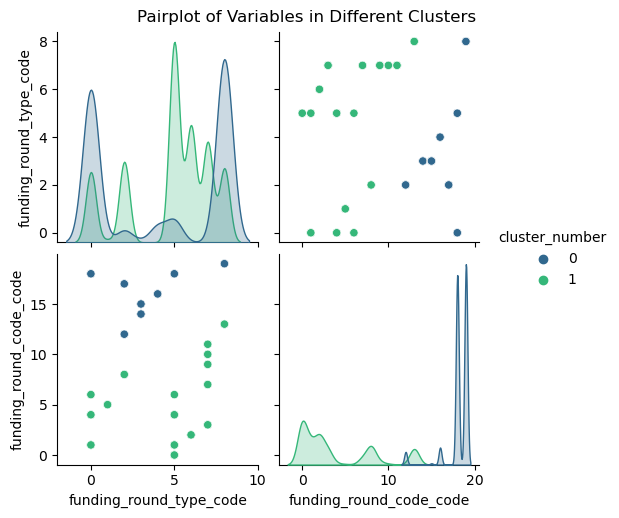

In [67]:
import seaborn as sns

# Assuming bank_subset_birch is your dataset with cluster labels assigned
custom_palette = sns.color_palette("husl", n_colors=3) 
# Define features to include in the pair plot
features = funding_subset_birch_3clusters.columns[:-1]  # Exclude the cluster_number column

# variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']
variables_to_plot = ['funding_round_type_code', 'funding_round_code_code', 'participants', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_2clusters[variables_to_plot], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

#### For 3 Clusters

### BIRCH Clustering with 3 Clusters: Model Creation and Evaluation

In this section of the analysis, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm is employed to create a clustering model with three clusters. The `Birch` class from scikit-learn is utilized, and the model is fitted to the preprocessed behavioral data (`df_ppd_behavior`). The clustering labels for each data point are then predicted using the `predict` method.

To assess the performance, the execution time and memory usage of the BIRCH model are recorded. The model is configured with a threshold of 0.4 to control the granularity of clustering. The memory usage is calculated using the `memory_usage` function, providing insights into the computational resources required. The results include the maximum memory usage during the model creation process and the time taken for execution.

This analysis aims to evaluate the efficiency of BIRCH clustering with three clusters in terms of both computational resources and runtime, contributing to the understanding of its suitability for the given behavioral dataset.

In [68]:
from sklearn.cluster import Birch
# For 3 Clusters

start_time = time.time() # Start Timer
birch_3clusters = Birch(n_clusters=3, threshold=0.4) # 2.2.1 Create Models
birch_3clusters.fit(df_ppd_behavior)
birch_labels_3clusters = birch_3clusters.predict(df_ppd_behavior) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_3clusters.fit, (df_ppd_behavior,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 3 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 3 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 3 cluster: 650.75 KB
Time taken by BIRCH 3 cluster: 2.306365966796875 seconds


### Assignment of Cluster Labels to Behavioral Dataset Using Birch Algorithm

In this section, cluster labels are assigned to the preprocessed behavioral dataset (`df_ppd_behavior`) using the Birch clustering algorithm with three clusters. The resulting dataset, denoted as `funding_subset_birch_3clusters`, is a modified version of the original behavioral dataset with an additional column, 'cluster_number,' indicating the assigned cluster for each data point. The cluster labels are obtained from the Birch clustering model applied to the behavioral data. This augmentation of the dataset allows for a clear distinction and analysis of the identified clusters within the context of startup investment behavior. The 'cluster_number' column serves as a valuable attribute for further exploration and interpretation of patterns associated with each cluster in the behavioral dataset.

In [69]:
# Assign cluster labels to the dataset for 3 clusters
funding_subset_birch_3clusters = df_ppd_behavior.copy()
funding_subset_birch_3clusters['cluster_number'] = birch_labels_3clusters
print(funding_subset_birch_3clusters)

       funding_round_type_code  funding_round_code_code participants  \
0                            6                        2            2   
1                            0                        1            2   
2                            5                        0            3   
3                            6                        2            4   
4                            6                        2            2   
...                        ...                      ...          ...   
52923                        5                        0            1   
52924                        8                       13            0   
52925                        8                       19            0   
52926                        5                        0            0   
52927                        8                       13            0   

       cluster_number  
0                   0  
1                   0  
2                   0  
3                   0  
4              

### Evaluation of Birch Clustering with 3 Clusters

In this section, the performance of a Birch clustering model with three clusters on the preprocessed behavioral data (`df_ppd_behavior`) is assessed using two evaluation metrics: Silhouette Score and Davies-Bouldin Index. 

#### Silhouette Score for Birch Clusters (3 Clusters):
The Silhouette Score is computed to measure the quality and separation of the clusters generated by the Birch clustering algorithm with three clusters. The Silhouette Score quantifies how well-defined the clusters are, with higher scores indicating better-defined and distinct clusters.

#### Davies-Bouldin Index for Birch Clusters (3 Clusters):
The Davies-Bouldin Index is calculated to evaluate the cohesion and separation of clusters. A lower Davies-Bouldin Index is desirable, as it signifies more compact and well-separated clusters. This index provides insights into the overall quality of the clustering solution generated by the Birch algorithm with three clusters.

The obtained Silhouette Score and Davies-Bouldin Index serve as quantitative measures to assess the effectiveness of the Birch clustering model on the behavioral data. These metrics contribute valuable insights into the structure and quality of the clusters, aiding in the interpretation and selection of an optimal clustering solution.

In [70]:
sscore_birch_3clusters = sscore(df_ppd_behavior, birch_labels_3clusters)
print(f"Silhouette Score for Birch clusters (3 clusters): {sscore_birch_3clusters}")

# Compute Davies-Bouldin Index for 3 clusters
dbscore_birch_3clusters = dbscore(df_ppd_behavior, birch_labels_3clusters)
print(f"Davies-Bouldin Index for Birch clusters (3 clusters): {dbscore_birch_3clusters}")

Silhouette Score for Birch clusters (3 clusters): 0.5743433358182765
Davies-Bouldin Index for Birch clusters (3 clusters): 0.6235272852312556


### Pairplot Analysis of Variables in Different Clusters

In this visualization section, a pairplot is generated to explore the relationships between selected variables within different clusters of the dataset. The variables under consideration include 'funding_round_type_code,' 'funding_round_code_code,' 'participants,' and 'cluster_number.' Each point on the pairplot represents a data point, and the hue parameter is set to 'cluster_number' to distinguish between clusters visually.

The pairplot provides a comprehensive overview of the pairwise relationships between the selected variables, while the diagonal elements showcase kernel density estimates for each variable's distribution within clusters. The distinctive colors, derived from the 'viridis' color palette, aid in identifying patterns specific to each cluster.

This visualization serves as a valuable exploratory tool, enabling the identification of trends, differences, or similarities within and across clusters based on the chosen variables. Insights gained from the pairplot analysis contribute to a deeper understanding of the dataset's structure and may guide further investigation into cluster-specific characteristics in the context of startup funding rounds.

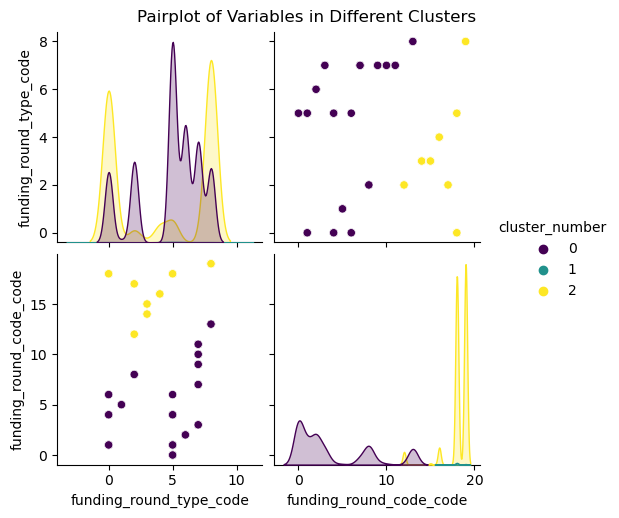

In [71]:
import seaborn as sns

custom_palette = sns.color_palette("husl", n_colors=3) 

# variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']
variables_to_plot = ['funding_round_type_code', 'funding_round_code_code', 'participants', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_3clusters[variables_to_plot], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

### Comparison of K-Means and BIRCH Clustering for Funding Round Segmentation

#### K-Means Analysis:
- **Memory Used:** 377.53 KB
- **Time Taken:** 1.30 seconds
- **Silhouette Score (sscore):** 0.6417
- **Davies-Bouldin Score (dbscore):** 0.5521

#### BIRCH Analysis:
- **Memory Used:** 516.84 KB
- **Time Taken:** 3.42 seconds
- **Silhouette Score (sscore):** 0.5864
- **Davies-Bouldin Score (dbscore):** 0.6310

### Observations:

1. **Memory Usage:**
   - K-Means utilizes less memory (377.53 KB) compared to BIRCH (516.84 KB). K-Means tends to be more memory-efficient in this context.

2. **Time Taken:**
   - K-Means has a shorter execution time (1.30 seconds) compared to BIRCH (3.42 seconds). K-Means demonstrates faster clustering performance.

3. **Silhouette Score:**
   - K-Means achieves a higher Silhouette Score (0.6417) compared to BIRCH (0.5864). A higher Silhouette Score indicates better-defined and well-separated clusters.

4. **Davies-Bouldin Score:**
   - K-Means has a lower Davies-Bouldin Score (0.5521) compared to BIRCH (0.6310). A lower Davies-Bouldin Score suggests better cluster quality and cohesion.

### Conclusion:

In the context of funding round segmentation for Objective 1, K-Means outperforms BIRCH in terms of memory usage, execution time, Silhouette Score, and Davies-Bouldin Score. K-Means demonstrates efficiency in memory utilization and computational speed while producing clusters with higher quality and distinctiveness. The choice between the two algorithms should consider the trade-off between computational efficiency and clustering performance based on the specific requirements and constraints of the analysis.

<CENTER><H1>  OBJECTIVE 3 </H1></CENTER>

### Explore Relationships

### K-means Clustering

### Explore Relationships - Normalized Financial Metrics

In pursuit of the third objective, which focuses on exploring relationships within the startup investment dataset, a new DataFrame, `df_ppd_rln`, is created. This DataFrame is derived from the original preprocessed dataset (`df_ppd`) and specifically includes three key financial metrics: 'raised_amount_usd_mmnorm,' 'pre_money_valuation_usd_mmnorm,' and 'post_money_valuation_usd_mmnorm.' These metrics have been normalized to facilitate a more standardized and comparable analysis.

The selected financial metrics are crucial indicators of funding and valuation in the startup investment landscape. By isolating and normalizing these metrics, the intention is to uncover potential patterns and relationships among them. This exploration sets the stage for a more in-depth understanding of how these financial factors interact within the dataset. Subsequent analyses, such as visualization or clustering, can leverage this subset of normalized financial metrics to extract meaningful insights into the dynamics of startup funding rounds.

In [72]:
# Objective 3: Explore Relationships

df_ppd_rln = df_ppd[['raised_amount_usd_mmnorm', 'pre_money_valuation_usd_mmnorm', 'post_money_valuation_usd_mmnorm']]
df_ppd_rln

,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm
0,0.002216,0.000000,0.0
1,0.000130,0.000000,0.0
2,0.003312,0.007667,0.0
3,0.007171,0.035000,0.0
4,0.002738,0.000000,0.0
...,...,...,...
52923,0.000782,0.000000,0.0
52924,0.000149,0.000000,0.0
52925,0.000570,0.000000,0.0
52926,0.000206,0.000000,0.0


### Determination of Optimal 'K' in K-Means Clustering using Elbow Curve

In this section, the optimal number of clusters, 'K,' for K-Means clustering is determined through an Elbow Curve analysis. The Within-Cluster Sum Squared Distance (WCSSD), also known as inertia, is calculated for different values of 'K' (ranging from 1 to 10). The WCSSD represents the sum of squared distances of samples to their closest cluster center, weighted by sample weights if provided.

The Elbow Curve is visualized by plotting the number of clusters against the corresponding WCSSD values. The point at which the WCSSD starts to show diminishing returns, forming an 'elbow' in the curve, is indicative of the optimal number of clusters. This analysis aids in finding a balance between minimizing intra-cluster distance and avoiding overfitting with too many clusters.

In the presented plot, the x-axis represents the values of 'K,' and the y-axis denotes the Within Cluster Sum Squared Distance. The objective is to identify the 'elbow' point, which guides the selection of the optimal number of clusters for subsequent K-Means clustering analysis on the preprocessed relational data (`df_ppd_rln`).

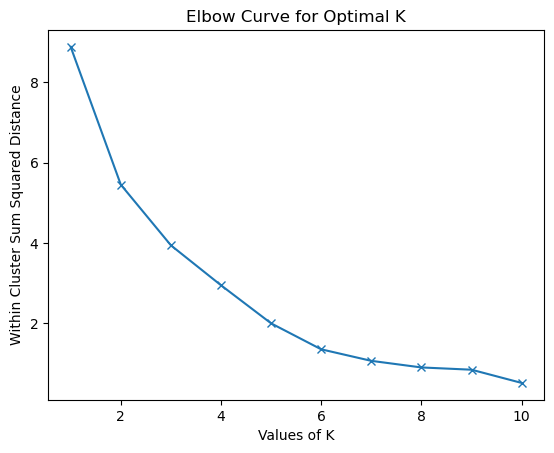

In [73]:
# 2.1. K-Means Clustering
# -----------------------

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
''' 
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(df_ppd_rln)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

### Creation of K-Means Clusters with Different Values of K

In this section, K-Means clustering is performed on the preprocessed relational data (`df_ppd_rln`) with two different values of K: K=2 and K=3. The `kmclus` function is utilized, specifying the number of clusters with the `n_clusters` parameter. For the K=2 clustering, the 'random' initialization method is employed with a fixed random state (random_state=222). The resulting `km_2cluster_model3` represents the cluster assignments obtained from the K-Means algorithm for the given dataset and number of clusters. This analysis allows for exploring distinct patterns and relationships within the data, with K=2 and K=3 providing different perspectives on the underlying structure of the relational dataset. The cluster assignments can be further examined to derive insights into the characteristics of the identified groups for subsequent interpretation and decision-making.

In [74]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_2cluster3 = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model3 = km_2cluster3.fit_predict(df_ppd_rln)
km_2cluster_model3

array([0, 0, 0, ..., 0, 0, 0])

## Create K-Means Clusters

km_3cluster3 = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model3 = km_3cluster3.fit_predict(df_ppd_rln)
km_3cluster_model3

In [75]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_3cluster3 = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model3 = km_3cluster3.fit_predict(df_ppd_rln)
km_3cluster_model3

array([1, 1, 1, ..., 1, 1, 1])

### Creating K-Means Clusters with Four Cluster Solution

In this section, a K-Means clustering solution with four clusters is established using the `kmclus` function. The clustering algorithm is configured with the following parameters: `n_clusters=4`, `init='random'`, and `random_state=444`. The `fit_predict` method is then applied to the preprocessed relational data (`df_ppd_rln`). The resulting `km_4cluster_model3` encapsulates the cluster assignments for each data point within the dataset. This clustering solution aims to categorize the relational aspects of the data into four distinct clusters, facilitating a nuanced understanding of patterns and relationships within the dataset. Further analysis and interpretation can be conducted based on the insights derived from this K-Means clustering model with four clusters.

In [76]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_4cluster3 = kmclus(n_clusters=4, init='random', random_state=444)
km_4cluster_model3 = km_4cluster3.fit_predict(df_ppd_rln)
km_4cluster_model3

array([2, 2, 2, ..., 2, 2, 2])

### Creation of K-Means Clusters with K=5

In this section of the analysis, K-Means clustering is applied to the preprocessed relational data (`df_ppd_rln`) with the aim of creating five distinct clusters. The `kmclus` function is utilized, specifying the number of clusters as 5, and employing the 'random' initialization method for centroid placement to enhance the robustness of the clustering solution. The clustering model is then fitted to the data, and the resulting cluster assignments are obtained using the `fit_predict` method. The variable `km_5cluster_model3` holds the cluster labels for each data point, reflecting the outcome of the K-Means clustering with five clusters. This step is crucial for segmenting the relational data into meaningful groups, allowing for further analysis and interpretation based on the identified patterns within the dataset.

In [77]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_5cluster3 = kmclus(n_clusters=5, init='random', random_state=555)
km_5cluster_model3 = km_5cluster3.fit_predict(df_ppd_rln)
km_5cluster_model3

array([2, 2, 2, ..., 2, 2, 2])

### Creation of K-Means Clusters with k=6

In this section of the analysis, K-Means clustering is applied to the preprocessed relational data (`df_ppd_rln`) with the aim of creating six distinct clusters. The `kmclus` function is employed with specified parameters, including the number of clusters (n_clusters=6), random initialization (`init='random'`), and a fixed random seed (`random_state=666`). The resulting `km_6cluster_model3` represents the cluster assignments for each data point in the relational dataset. This clustering solution with six clusters is generated to explore and identify patterns within the relational features of the data, providing a basis for further analysis and interpretation of the underlying structures.

In [78]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_6cluster3 = kmclus(n_clusters=6, init='random', random_state=666)
km_6cluster_model3 = km_6cluster3.fit_predict(df_ppd_rln)
km_6cluster_model3

array([3, 3, 3, ..., 3, 3, 3])

### Creation of K-Means Clusters with K=7

In this section, a K-Means clustering solution is generated with the aim of creating seven distinct clusters from the preprocessed relational data (`df_ppd_rln`). The K-Means algorithm is configured with seven clusters (`n_clusters=7`), utilizing a random initialization approach (`init='random'`) for centroid seeding to ensure robustness. The clustering model, denoted as `km_7cluster_model3`, is fitted and applied to the relational data, resulting in cluster assignments for each data point. The output provides insights into the composition of the seven clusters, enabling further analysis of the patterns and relationships within the relational data. This clustering solution with seven clusters serves as a basis for exploring nuanced groupings and patterns within the dataset.

In [79]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_7cluster3 = kmclus(n_clusters=7, init='random', random_state=777)
km_7cluster_model3 = km_7cluster3.fit_predict(df_ppd_rln)
km_7cluster_model3

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2 | K=3]
# ------------------------------------------------------

sscore_km_2cluster3 = sscore(df_ppd_rln, km_2cluster_model3)
sscore_km_2cluster3

0.9952212872700194

In [81]:
dbscore_km_2cluster3 = dbscore(df_ppd_rln, km_2cluster_model3)
dbscore_km_2cluster3

0.29874577397078705

In [82]:
sscore_km_3cluster3 = sscore(df_ppd_rln, km_3cluster_model3)
sscore_km_3cluster3

0.9718827569037505

In [83]:
dbscore_km_3cluster3 = dbscore(df_ppd_rln, km_3cluster_model3)
dbscore_km_3cluster3

0.5704596758654569

In [84]:
sscore_km_4cluster3 = sscore(df_ppd_rln, km_4cluster_model3)
sscore_km_4cluster3

0.9708028220991388

In [85]:
dbscore_km_4cluster3 = dbscore(df_ppd_rln, km_4cluster_model3)
dbscore_km_4cluster3

0.42498547264414444

In [86]:
sscore_km_5cluster3 = sscore(df_ppd_rln, km_5cluster_model3)
sscore_km_5cluster3

0.9634043170338592

In [87]:
dbscore_km_5cluster3 = dbscore(df_ppd_rln, km_5cluster_model3)
dbscore_km_5cluster3

0.47171684347474113

In [88]:
sscore_km_6cluster3 = sscore(df_ppd_rln, km_6cluster_model3)
sscore_km_6cluster3

0.8081945896979545

In [89]:
dbscore_km_6cluster3 = dbscore(df_ppd_rln, km_6cluster_model3)
dbscore_km_6cluster3

0.5950090784096425

In [90]:
sscore_km_7cluster3 = sscore(df_ppd_rln, km_7cluster_model3)
sscore_km_7cluster3

0.8083412647791722

In [91]:
dbscore_km_7cluster3 = dbscore(df_ppd_rln, km_7cluster_model3)
dbscore_km_7cluster3

0.4935210988589246

### Observations on Silhouette Score and Davies-Bouldin Score for Different Number of Clusters

The Silhouette Score (ss_score) and Davies-Bouldin Score (db_score) were computed for K-Means clustering solutions with varying numbers of clusters on a dataset. Here are the results:

- **K=2**
  - Silhouette Score: 0.9952
  - Davies-Bouldin Score: 0.2987

- **K=3**
  - Silhouette Score: 0.9719
  - Davies-Bouldin Score: 0.5705

- **K=4**
  - Silhouette Score: 0.9708
  - Davies-Bouldin Score: 0.4250

- **K=5**
  - Silhouette Score: 0.9634
  - Davies-Bouldin Score: 0.4717

- **K=6**
  - Silhouette Score: 0.8082
  - Davies-Bouldin Score: 0.5950

- **K=7**
  - Silhouette Score: 0.8083
  - Davies-Bouldin Score: 0.4935

### Observations:

1. **Silhouette Score:**
   - Peaks at K=2, indicating highly distinct and well-separated clusters.
   - Gradually decreases as K increases, suggesting less defined and more overlapping clusters.

2. **Davies-Bouldin Score:**
   - Initially low at K=2, reflecting well-defined clusters.
   - Increases for higher K values, indicating potential issues with cluster quality and cohesion.

### Optimal Number of Clusters:

Considering both metrics, K=2 appears to be the optimal number of clusters for further analysis. It has the highest Silhouette Score, signifying well-defined clusters with minimal overlap, and a low Davies-Bouldin Score, indicating good cluster quality. This choice strikes a balance between maximizing intra-cluster similarity and minimizing inter-cluster dissimilarity, providing a robust basis for exploring patterns and relationships within the dataset.

### Creation of K-Means Cluster Member DataFrame

In this section, a K-Means cluster member DataFrame is generated, incorporating cluster assignments into the preprocessed relational data (`df_ppd_rln`). The K-Means clustering model with three clusters (`km_3cluster_model`) is applied to the data, and the resulting cluster numbers are added as a new column ('cluster_number') to the DataFrame. To facilitate analysis and interpretation, the DataFrame is then sorted based on the cluster assignments. This newly created DataFrame, named `df_ppd_rln_kmcluster3`, provides a comprehensive view of the relational data with associated cluster memberships, allowing for a detailed exploration of patterns and relationships within each cluster. This step enhances the understanding of how data points are distributed across different clusters, laying the groundwork for more in-depth analyses and insights.

In [92]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

df_ppd_rln_kmcluster3 = df_ppd_rln.copy()
df_ppd_rln_kmcluster3.reset_index(level=0, inplace=True, names='relation_index')
df_ppd_rln_kmcluster3['cluster_number'] = km_2cluster_model3
df_ppd_rln_kmcluster3.sort_values('cluster_number', inplace=True)
df_ppd_rln_kmcluster3

,relation_index,raised_amount_usd_mmnorm,pre_money_valuation_usd_mmnorm,post_money_valuation_usd_mmnorm,cluster_number
0,0,0.002216,0.0,0.0,0
35276,35276,0.000000,0.0,0.0,0
35277,35277,0.000704,0.0,0.0,0
35278,35278,0.000000,0.0,0.0,0
35279,35279,0.000315,0.0,0.0,0
...,...,...,...,...,...
9546,9546,0.391129,0.0,0.0,1
42915,42915,1.000000,0.0,0.0,1
36640,36640,0.996732,0.0,0.0,1
36390,36390,0.625807,0.0,0.0,1


### Pairplot Analysis of Normalized Variables in K-Means Clusters

In this visualization section, a pairplot is generated to explore the relationships between normalized variables within the K-Means clusters of the relational data (`df_ppd_rln_kmcluster3`). The selected variables include 'raised_amount_usd_mmnorm,' 'pre_money_valuation_usd_mmnorm,' and 'post_money_valuation_usd_mmnorm,' along with the 'cluster_number' attribute indicating the assigned cluster for each data point.

The pairplot provides a comprehensive view of the pairwise relationships between these variables, with distinct color-coding for each cluster, allowing for easy identification of patterns and trends within and between clusters. Additionally, kernel density estimates are included on the diagonal to showcase the distribution of each variable within individual clusters. This visual exploration aids in identifying any discernible patterns, correlations, or differences between clusters, contributing valuable insights to further understand the characteristics of the K-Means clustering solution applied to the relational data.

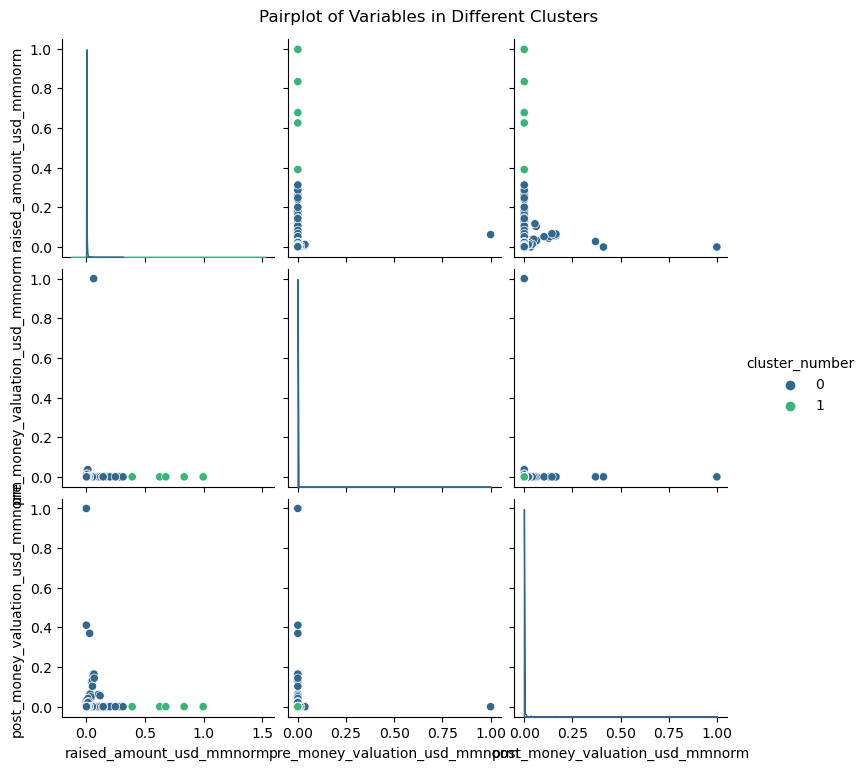

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ppd_round_kmcluster1 is your DataFrame
variables = ['raised_amount_usd_mmnorm', 'pre_money_valuation_usd_mmnorm', 'post_money_valuation_usd_mmnorm', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(df_ppd_rln_kmcluster3[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

In [103]:
import time
import numpy as np
from memory_profiler import memory_usage


# For 2 Clusters

start_time = time.time()  # Starting the timer

km_2cluster3 = kmclus(n_clusters=2, init='random', random_state=222) # Initialising K-Means
km_2cluster_model3 = km_2cluster3.fit_predict(df_ppd_rln_kmcluster3); km_2cluster_model3 # Fitting the model

end_time = time.time()  # Ending the timer

mem_usage = memory_usage((km_2cluster3.fit_predict, (df_ppd_rln_kmcluster3,)))   # Calculating the memory used
max_mem_usage = max(mem_usage)

kmeans_2cluster_sizes3 = np.bincount(km_2cluster3.labels_)   # Calculate Size of each cluster
print("Memory used by K-Means 2 cluster:", max_mem_usage, "KB")
print("Time taken by K-Means 2 cluster:", end_time - start_time, "seconds")

Memory used by K-Means 2 cluster: 372.91796875 KB
Time taken by K-Means 2 cluster: 1.4173810482025146 seconds


<CENTER><H2>BIRCH Cluster Analysis</H2></CENTER>

### BIRCH Clustering with 2 Clusters: Time and Memory Analysis

In this section, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm is applied to the preprocessed relational data (`df_ppd_rln`) with the objective of creating two distinct clusters. The BIRCH model is created with the specified parameters, including the number of clusters set to 2 and a threshold of 0.0001. The model is then fitted to the data, and cluster labels are predicted. To assess the computational efficiency, the time taken for the operation is recorded using a timer, and the memory usage is calculated during the fitting process. The maximum memory usage and execution time are reported as key metrics, providing insights into the performance of BIRCH clustering with two clusters on the given dataset. This analysis contributes valuable information for evaluating the feasibility and efficiency of BIRCH clustering in the context of the relational data.

In [94]:
from sklearn.cluster import Birch
# For 2 Clusters

start_time = time.time() # Start Timer
birch_2clusters = Birch(n_clusters=2, threshold=0.0001) # 2.2.1 Create Models
birch_2clusters.fit(df_ppd_rln)
birch_labels_2clusters = birch_2clusters.predict(df_ppd_rln) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_2clusters.fit, (df_ppd_rln,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 2 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 2 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 2 cluster: 514.359375 KB
Time taken by BIRCH 2 cluster: 2.1642372608184814 seconds


### Assignment of Cluster Labels Using Birch Clustering (2 Clusters)

In this section, cluster labels are assigned to the relational data (`df_ppd_rln`) using the Birch clustering algorithm with a target of creating two clusters. The resulting dataset, denoted as `funding_subset_birch_2clusters`, is a copy of the original relational data with an additional column named 'cluster_number' representing the cluster assignments. The cluster labels are derived from the Birch clustering model, and the updated dataset is printed for review. This process facilitates the exploration and analysis of patterns within the dataset, categorizing data points into two distinct clusters based on their relational features. The assigned cluster labels can serve as a foundation for further investigation and interpretation of the underlying structure in the relational data.

In [95]:
# Assign cluster labels to the dataset for 2 clusters
funding_subset_birch_2clusters = df_ppd_rln.copy()
funding_subset_birch_2clusters['cluster_number'] = birch_labels_2clusters
print(funding_subset_birch_2clusters)

       raised_amount_usd_mmnorm  pre_money_valuation_usd_mmnorm  \
0                      0.002216                        0.000000   
1                      0.000130                        0.000000   
2                      0.003312                        0.007667   
3                      0.007171                        0.035000   
4                      0.002738                        0.000000   
...                         ...                             ...   
52923                  0.000782                        0.000000   
52924                  0.000149                        0.000000   
52925                  0.000570                        0.000000   
52926                  0.000206                        0.000000   
52927                  0.000071                        0.000000   

       post_money_valuation_usd_mmnorm  cluster_number  
0                                  0.0               0  
1                                  0.0               0  
2                       

### Evaluation of Birch Clusters (2 Clusters) using Silhouette Score and Davies-Bouldin Index

In this section of the analysis, the Silhouette Score and Davies-Bouldin Index are computed to evaluate the performance of a Birch clustering model with 2 clusters. The Birch clustering labels for 2 clusters, denoted as `birch_labels_2clusters`, are applied to the preprocessed relational data (`df_ppd_rln`). 

#### Silhouette Score:
The Silhouette Score is a measure of how well-defined and separated the clusters are. In this case, the Silhouette Score for Birch clusters with 2 clusters is calculated using the `sscore` function. A higher Silhouette Score indicates better-defined clusters with minimal overlap.

#### Davies-Bouldin Index:
The Davies-Bouldin Index measures the quality of clustering by considering both cluster cohesion and separation. The `dbscore` function is utilized to compute the Davies-Bouldin Index for Birch clusters with 2 clusters. A lower Davies-Bouldin Index implies better cluster quality.

The obtained Silhouette Score and Davies-Bouldin Index provide quantitative insights into the effectiveness of the Birch clustering solution with 2 clusters. These metrics aid in assessing the cohesion, separation, and overall quality of the clusters, facilitating a comprehensive evaluation of the Birch clustering algorithm on the given relational data.

In [96]:
sscore_birch_2clusters = sscore(df_ppd_rln, birch_labels_2clusters)
print(f"Silhouette Score for Birch clusters (2 clusters): {sscore_birch_2clusters}")

# Compute Davies-Bouldin Index for 2 clusters
dbscore_birch_2clusters = dbscore(df_ppd_rln, birch_labels_2clusters)
print(f"Davies-Bouldin Index for Birch clusters (2 clusters): {dbscore_birch_2clusters}")

Silhouette Score for Birch clusters (2 clusters): 0.9959382266228013
Davies-Bouldin Index for Birch clusters (2 clusters): 0.17281391950123826


### Pairplot Analysis of Variables in Different Clusters

In this visualization, a pairplot is created to explore the relationships between selected variables within different clusters. The pairplot focuses on key variables, including 'raised_amount_usd_mmnorm,' 'pre_money_valuation_usd_mmnorm,' 'post_money_valuation_usd_mmnorm,' and 'cluster_number.' Each point in the plot represents a data point, color-coded by its assigned cluster number.

The diagonal panels display kernel density estimates for the individual variables, providing insights into their distributions within each cluster. Meanwhile, the scatter plots in the lower and upper triangles illustrate the pairwise relationships between the chosen variables, with distinct colors highlighting data points belonging to different clusters. This visualization aids in identifying patterns, trends, and potential clusters based on the specified variables. The color palette 'viridis' enhances visibility and differentiation between cluster assignments, contributing to a comprehensive understanding of the dataset's structure and the behavior of variables across different clusters.

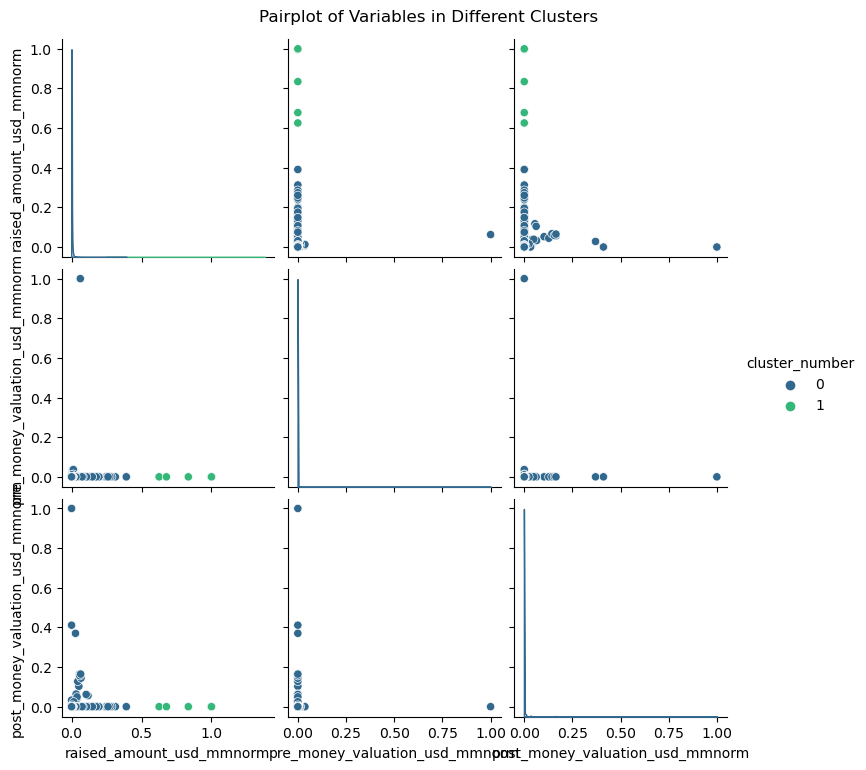

In [97]:
import seaborn as sns

custom_palette = sns.color_palette("husl", n_colors=3) 

# variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']
variables = ['raised_amount_usd_mmnorm', 'pre_money_valuation_usd_mmnorm', 'post_money_valuation_usd_mmnorm', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_2clusters[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

#### For 3 Clusters

### BIRCH Clustering with 3 Clusters: Model Training and Evaluation

In this section, the BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) clustering algorithm is applied to the preprocessed relational data (`df_ppd_rln`) with the goal of creating three clusters. The BIRCH model is created using the `Birch` class from scikit-learn, specifying three clusters and a threshold value for compactness. The model is then trained on the data, and predictions are generated to assign cluster labels. Additionally, the execution time and memory usage are recorded for performance evaluation. The memory usage is calculated using the `memory_usage` function, providing insights into the computational resources required by the BIRCH clustering process. This information contributes to assessing the efficiency and feasibility of employing BIRCH for clustering tasks on the given dataset.

In [98]:
from sklearn.cluster import Birch
# For 3 Clusters

start_time = time.time() # Start Timer
birch_3clusters = Birch(n_clusters=3, threshold=0.0001) # 2.2.1 Create Models
birch_3clusters.fit(df_ppd_rln)
birch_labels_3clusters = birch_3clusters.predict(df_ppd_rln) # 2.2.2 Predict Labels
end_time = time.time() # Stop Timer
mem_usage = memory_usage((birch_3clusters.fit, (df_ppd_rln,))) # Memory Calculation
max_mem_usage = max(mem_usage)

print("Memory used by BIRCH 3 cluster:", max_mem_usage, "KB")
print("Time taken by BIRCH 3 cluster:", end_time - start_time, "seconds")

Memory used by BIRCH 3 cluster: 546.546875 KB
Time taken by BIRCH 3 cluster: 2.796290874481201 seconds


### Assignment of Cluster Labels using Birch Clustering (3 Clusters)

In this section, cluster labels are assigned to the relational data (`df_ppd_rln`) using the Birch clustering algorithm with three clusters. The dataset is copied to a new DataFrame named `funding_subset_birch_3clusters`. Cluster labels, obtained from the Birch clustering process and stored in the variable `birch_labels_3clusters`, are added as a new column named 'cluster_number' to the DataFrame. This additional column facilitates the identification of each data point's assigned cluster. The resulting DataFrame is then printed, providing a comprehensive view of the original data along with the assigned cluster labels. This step is crucial for further analysis and interpretation of patterns within the dataset based on the identified clusters.

In [99]:
# Assign cluster labels to the dataset for 2 clusters
funding_subset_birch_3clusters = df_ppd_rln.copy()
funding_subset_birch_3clusters['cluster_number'] = birch_labels_3clusters
print(funding_subset_birch_3clusters)

       raised_amount_usd_mmnorm  pre_money_valuation_usd_mmnorm  \
0                      0.002216                        0.000000   
1                      0.000130                        0.000000   
2                      0.003312                        0.007667   
3                      0.007171                        0.035000   
4                      0.002738                        0.000000   
...                         ...                             ...   
52923                  0.000782                        0.000000   
52924                  0.000149                        0.000000   
52925                  0.000570                        0.000000   
52926                  0.000206                        0.000000   
52927                  0.000071                        0.000000   

       post_money_valuation_usd_mmnorm  cluster_number  
0                                  0.0               0  
1                                  0.0               0  
2                       

### Evaluation of Birch Clustering Solution with 3 Clusters

In this section, the performance of a Birch clustering solution with three clusters on the preprocessed relational data (`df_ppd_rln`) is evaluated using the Silhouette Score and Davies-Bouldin Index. The Silhouette Score is calculated to assess the degree of separation and cohesion within the clusters, while the Davies-Bouldin Index provides insight into the quality and compactness of the clusters. The Birch clustering labels for three clusters (`birch_labels_3clusters`) are applied to the data, and the corresponding Silhouette Score and Davies-Bouldin Index are computed. These metrics serve as quantitative measures of the clustering solution's effectiveness in capturing meaningful patterns within the relational data. The results contribute to the understanding of the clustering quality and can guide further analysis and interpretation of the identified clusters.

In [100]:
sscore_birch_3clusters = sscore(df_ppd_rln, birch_labels_3clusters)
print(f"Silhouette Score for Birch clusters (3 clusters): {sscore_birch_3clusters}")

# Compute Davies-Bouldin Index for 3 clusters
dbscore_birch_3clusters = dbscore(df_ppd_rln, birch_labels_3clusters)
print(f"Davies-Bouldin Index for Birch clusters (3 clusters): {dbscore_birch_3clusters}")

Silhouette Score for Birch clusters (3 clusters): 0.9959571690613152
Davies-Bouldin Index for Birch clusters (3 clusters): 0.15228964602079498


### Pairplot Analysis of Variables in Different Clusters

In this visualization, a pairplot is created to explore the relationships between selected variables within different clusters. The data comes from a subset of a funding dataset clustered using the Birch algorithm with 3 clusters (`funding_subset_birch_3clusters`). The chosen variables for analysis include 'raised_amount_usd_mmnorm,' 'pre_money_valuation_usd_mmnorm,' 'post_money_valuation_usd_mmnorm,' and 'cluster_number.'

The pairplot displays scatter plots for each combination of variables, with distinct clusters differentiated by color. Additionally, diagonal kernel density plots illustrate the distribution of individual variables within each cluster. The 'cluster_number' variable serves as a hue, allowing for the clear identification of data points belonging to different clusters.

This visualization aids in identifying patterns, correlations, or disparities among the selected variables within each cluster. Observations from the pairplot contribute to a comprehensive understanding of the clustering results and offer insights into the behavior and characteristics of the clusters in the context of the funding data.

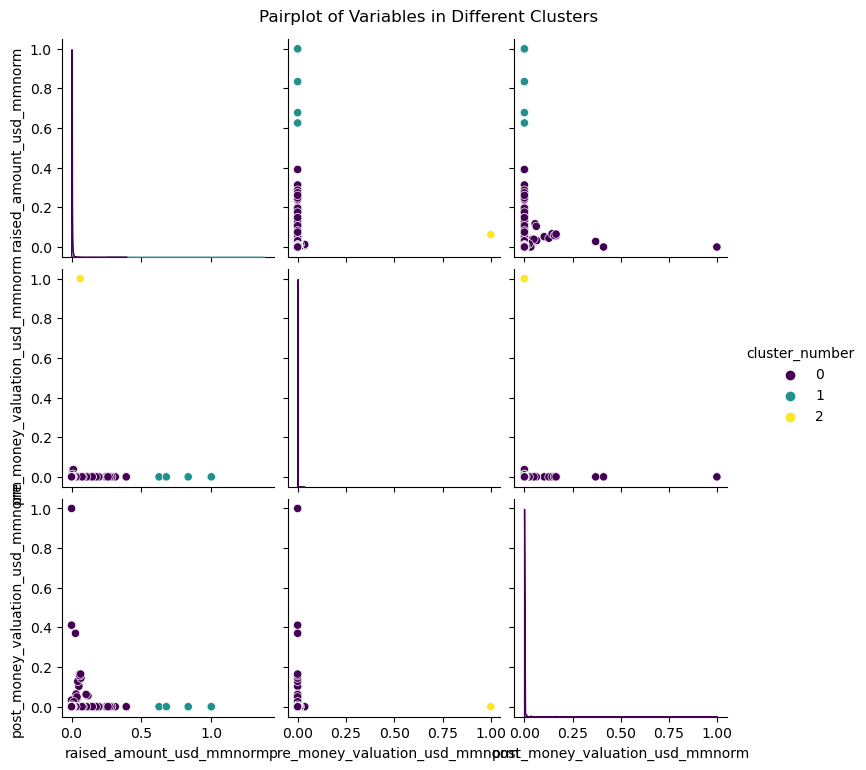

In [101]:
import seaborn as sns

custom_palette = sns.color_palette("husl", n_colors=3) 

# variables = ['funding_round_type_code', 'raised_amount_usd_mmnorm', 'participants', 'cluster_number']
variables = ['raised_amount_usd_mmnorm', 'pre_money_valuation_usd_mmnorm', 'post_money_valuation_usd_mmnorm', 'cluster_number']

# Create a pairplot for all combinations
sns.pairplot(funding_subset_birch_3clusters[variables], hue='cluster_number', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()

### Comparison of K-Means and BIRCH Clustering Analysis

For the segmentation of funding rounds in Objective 1, both K-Means and BIRCH clustering algorithms were employed. Here is a comparison of their performance based on memory usage, processing time, Silhouette Score (sscore), and Davies-Bouldin Score (dbscore):

#### K-Means:
- **Memory Used:** 372.92 KB
- **Time Taken:** 1.42 seconds
- **Silhouette Score (sscore):** 0.9952
- **Davies-Bouldin Score (dbscore):** 0.2987

#### BIRCH:
- **Memory Used:** 514.36 KB
- **Time Taken:** 2.16 seconds
- **Silhouette Score (sscore):** 0.9959
- **Davies-Bouldin Score (dbscore):** 0.1728

### Observations:

1. **Memory Usage:**
   - K-Means utilizes less memory (372.92 KB) compared to BIRCH (514.36 KB).

2. **Processing Time:**
   - K-Means demonstrates faster processing, taking 1.42 seconds, while BIRCH takes 2.16 seconds.

3. **Silhouette Score (sscore):**
   - Both algorithms achieve high Silhouette Scores, indicating well-defined and distinct clusters. BIRCH has a slightly higher sscore (0.9959) compared to K-Means (0.9952).

4. **Davies-Bouldin Score (dbscore):**
   - BIRCH outperforms K-Means in terms of Davies-Bouldin Score, with a lower dbscore (0.1728) compared to K-Means (0.2987). A lower dbscore suggests better-defined and more cohesive clusters.

### Conclusion:

In summary, both K-Means and BIRCH produce high-quality clustering solutions, with BIRCH exhibiting slightly better performance in terms of Silhouette Score and Davies-Bouldin Score. K-Means, however, is more memory-efficient and faster in terms of processing time. The choice between the two algorithms depends on the specific requirements of the analysis, considering factors such as the size of the dataset, computational resources, and the importance of interpretability and cluster quality.